# Drugs in this notebook: ONLY are the following (controls)

## caffeine
## carbamazepine
## fluoxetine

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import pylab as pl
import scipy.optimize
from scipy.stats import spearmanr
from IPython.display import Image 
# ISH_data_processed=pd.read_csv('data/ISH_processed_data_strict.csv')
# allen_brain_reg_coords=pd.read_csv('data/allen_brain_reg_coords.csv')
# allen_brain_reg_coords.drop('Unnamed: 0',axis=1,inplace=True)
gene_exp=pd.read_csv('notebook10data/ROI_ISH_data.csv')
# druglist=['amphetamine','caffeine','carbamazepine',
#          'cocaine','ethanol','fluoxetine','ketamine',
#          'meth','morphine','nicotine','stress','toluene']#,'All_Drugs']
druglist=['caffeine','carbamazepine','fluoxetine']#,'All_Drugs']
regions=list(gene_exp['brain_region2']) 
len(regions)

C:\Users\Kat\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Kat\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Kat\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


20

# Load data & packages

In [2]:
note8= pd.DataFrame(columns = ['gene','spearman_correlation','p_vals','drug'])
for drug in druglist:
    dfname='notebook8data/ISH_data_'+drug+'_ratio_spearmancorr.csv'
    temp=pd.read_csv(dfname, usecols = ['gene','spearman_correlation','p_vals'])
    temp['drug']=drug
    note8=pd.concat([note8, temp], axis=0)

In [3]:
notedatas8= pd.DataFrame(columns = ['brain_region2','ratio_drugviso'])
for drug in druglist:
    dfname='notebook8data/'+drug+'_v_iso_rabies.csv'
    temp=pd.read_csv(dfname, usecols = ['brain_region2','ratio_drugviso'])
    temp['drug']=drug
    notedatas8=pd.concat([notedatas8, temp], axis=0)

In [4]:
note10= pd.DataFrame(columns = ['gene','spearman_correlation','p_vals','drug'])
for drug in druglist:
    dfname='notebook10data/ISH_data_'+drug+'_ratio_spearmancorr.csv'
    temp=pd.read_csv(dfname, usecols = ['gene','spearman_correlation','p_vals'])
    temp['drug']=drug
    note10=pd.concat([note10, temp], axis=0) 

In [5]:
notedatas10= pd.DataFrame(columns = ['brain_region2','diff_drugviso'])
for drug in druglist:
    dfname='notebook10data/'+drug+'_v_iso_rabies.csv'
    temp=pd.read_csv(dfname, usecols = ['brain_region2','diff_drugviso'])
    temp['drug']=drug
    notedatas10=pd.concat([notedatas10, temp], axis=0) 

# Ratio (drug / iso rabies)

# Using all genes here

# Baseline of comparison for subsets of genes

C:\Users\Kat\AppData\Local\Temp/ipykernel_1116/2590796342.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  temp1=list(gene_exp.mean(axis=1))


r_val: -0.012994658779395546
p_val: 0.9215012024150583


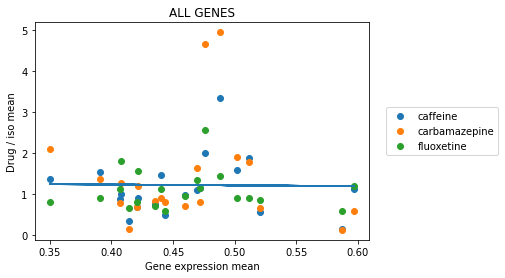

In [6]:
temp3=[]
temp4=[]
for drug in druglist:
    temp=notedatas8[notedatas8['drug']==drug]['ratio_drugviso']
    temp1=list(gene_exp.mean(axis=1))
    temp3=temp3+list(temp)
    temp4=temp4+list(temp1)
    plt.scatter(temp1,temp,label=drug)
plt.xlabel('Gene expression mean')
plt.ylabel('Drug / iso mean')
plt.title('ALL GENES')
#obtain m (slope) and b(intercept) of linear regression line
m, b, r_value, p_value, std_err = sp.stats.linregress(temp4, temp3)
#m, b = np.polyfit(temp1, temp, 1)
temp3 = [m*i+b  for i in list(temp4)]
#add linear regression line to scatterplot 
plt.plot(temp4, temp3)
plt.legend(loc="right",bbox_to_anchor=(1.4, 0.5))
plt.savefig("figures/notebook_11/controls-in6.svg")
print('r_val: '+str(r_value))
print('p_val: '+str(p_value))

# Separated by drug condition

# same as above plot but separated by drug and labelled

C:\Users\Kat\AppData\Local\Temp/ipykernel_1116/1578547201.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  temp1=list(gene_exp.mean(axis=1))


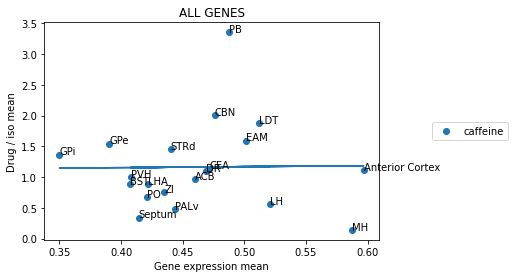

r_val: 0.013642586889995175
p_val: 0.954477222951903


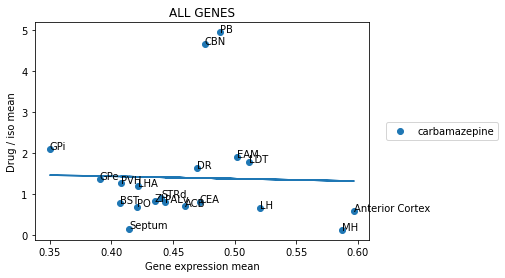

r_val: -0.028332325210832898
p_val: 0.9056154993772836


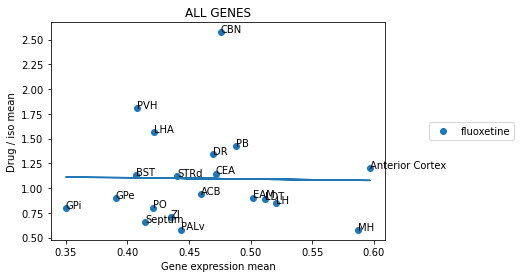

r_val: -0.01769409578578211
p_val: 0.9409780690488629


In [7]:
for drug in druglist:
    temp3=[]
    temp4=[]
    temp=notedatas8[notedatas8['drug']==drug]['ratio_drugviso']
    temp1=list(gene_exp.mean(axis=1))
    temp3=temp3+list(temp)
    temp4=temp4+list(temp1)
    m, b, r_value, p_value, std_err = sp.stats.linregress(temp4, temp3)
    temp3 = [m*i+b  for i in list(temp4)]
    plt.plot(temp4, temp3)
    plt.scatter(temp1,temp,label=drug)
    plt.xlabel('Gene expression mean')
    plt.ylabel('Drug / iso mean')
    plt.title('ALL GENES')
    plt.legend(loc="right",bbox_to_anchor=(1.4, 0.5))
    for i, txt in enumerate(regions):
        plt.annotate(txt, (temp1[i], temp[i]))
    title2="figures/notebook_11/controls-"+drug+"-in7.svg"
    plt.savefig(title2)
    plt.show()
    print('r_val: '+str(r_value))
    print('p_val: '+str(p_value))

# ^^ No clear correlation when using ALL genes. ^^

# Below using a subset of genes (positively or negatively correlated)

Next investigate which genes are common among these plots below (which genes consistently have high correlation for different drugs).

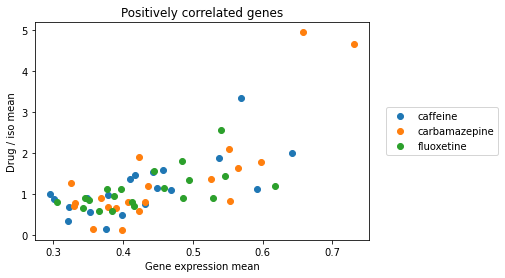

In [8]:
thresh=0.5
for drug in druglist:
    temp=note8[note8['drug']==drug]
    temp1=temp[temp['spearman_correlation']>thresh]
    genelist1=list(temp1['gene'])
    genelist=genelist1
    selectedgenes= gene_exp[genelist]
    temp=notedatas8[notedatas8['drug']==drug]['ratio_drugviso']
    temp1=list(selectedgenes.mean(axis=1))
    plt.scatter(temp1,temp,label=drug)
plt.xlabel('Gene expression mean')
plt.ylabel('Drug / iso mean')
plt.title('Positively correlated genes')
plt.legend(loc="right",bbox_to_anchor=(1.4, 0.5)) 
plt.savefig("figures/notebook_11/controls-in8.svg")

# same as above plot but separated by drug and labelled

# CBN is high for many drug conditions (not meth)

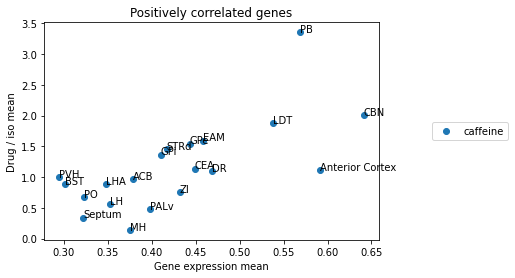

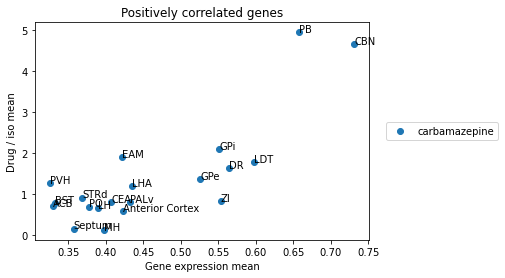

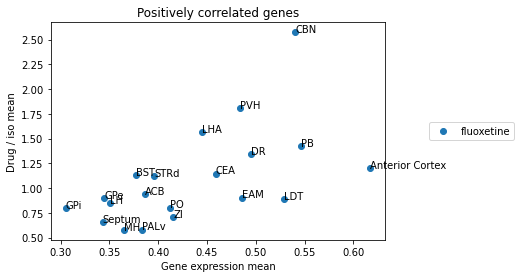

In [9]:
thresh=0.5
for drug in druglist:
    temp=note8[note8['drug']==drug]
    temp1=temp[temp['spearman_correlation']>thresh]
    genelist1=list(temp1['gene'])
    genelist=genelist1
    selectedgenes= gene_exp[genelist]
    temp=notedatas8[notedatas8['drug']==drug]['ratio_drugviso']
    temp1=list(selectedgenes.mean(axis=1))
    plt.scatter(temp1,temp,label=drug)
    plt.xlabel('Gene expression mean')
    plt.ylabel('Drug / iso mean')
    plt.title('Positively correlated genes')
    plt.legend(loc="right",bbox_to_anchor=(1.4, 0.5)) 
    for i, txt in enumerate(regions):
        plt.annotate(txt, (temp1[i], temp[i]))
    title2="figures/notebook_11/controls-"+drug+"-in9.svg"
    plt.savefig(title2)
    plt.show()

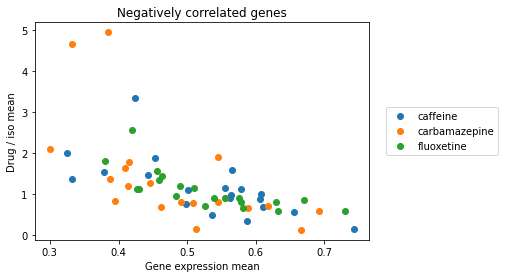

In [10]:
for drug in druglist:
    temp=note8[note8['drug']==drug]
    temp1=temp[temp['spearman_correlation']<-thresh] 
    genelist2=list(temp1['gene'])
    genelist=genelist2
    selectedgenes= gene_exp[genelist]
    temp=notedatas8[notedatas8['drug']==drug]['ratio_drugviso']
    temp1=list(selectedgenes.mean(axis=1))
    plt.scatter(temp1,temp,label=drug)
plt.xlabel('Gene expression mean')
plt.ylabel('Drug / iso mean')
plt.title('Negatively correlated genes')
plt.legend(loc="right",bbox_to_anchor=(1.4, 0.5)) 
plt.savefig("figures/notebook_11/controls-in10.svg")

# same as above plot but separated by drug and labelled

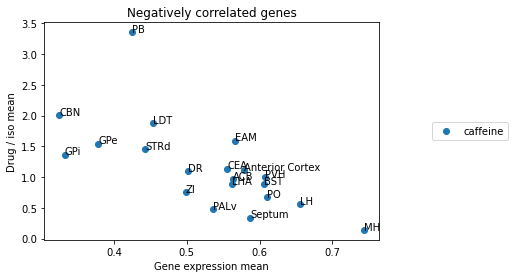

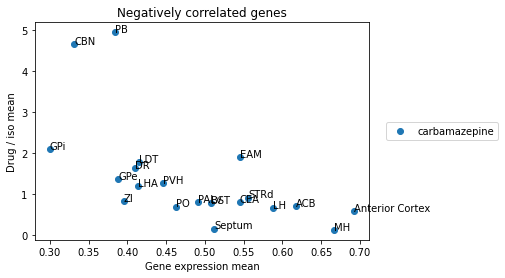

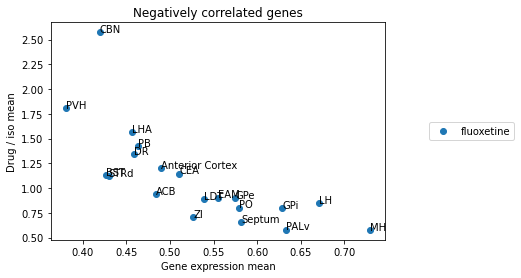

In [11]:
for drug in druglist:
    temp=note8[note8['drug']==drug]
    temp1=temp[temp['spearman_correlation']<-thresh] 
    genelist2=list(temp1['gene'])
    genelist=genelist2
    selectedgenes= gene_exp[genelist]
    temp=notedatas8[notedatas8['drug']==drug]['ratio_drugviso']
    temp1=list(selectedgenes.mean(axis=1))
    plt.scatter(temp1,temp,label=drug)
    plt.xlabel('Gene expression mean')
    plt.ylabel('Drug / iso mean')
    plt.title('Negatively correlated genes')
    plt.legend(loc="right",bbox_to_anchor=(1.4, 0.5)) 
    for i, txt in enumerate(regions):
        plt.annotate(txt, (temp1[i], temp[i]))
    title2="figures/notebook_11/controls-"+drug+"-in11.svg"
    plt.savefig(title2)
    plt.show()

# Look for re-occurring genes

# Re-occurring positively correlated genes

Correlated in over 1 drug

In [12]:
thresh=0.4
posgenes= pd.DataFrame(columns = ['pos_genes','drug'])
for drug in druglist:
    temp=note8[note8['drug']==drug]
    temp1=temp[temp['spearman_correlation']>thresh] 
    genelist2=list(temp1['gene'])
    genelist=genelist2
    temp=pd.DataFrame({'pos_genes':genelist})
    temp['drug']=drug
    posgenes=pd.concat([posgenes, temp], axis=0)
posgeneslst=list(posgenes['pos_genes'])
x = np.array(posgeneslst)
repetpos=[]
for elem in np.unique(x):
    if posgeneslst.count(elem) > 1:
        print(elem)
        repetpos.append(elem)
print('num pos repeating genes: ')
thresh=0.5
list(repetpos) 

0610010F05Rik
2610019F03Rik
2810405K02Rik
9630033F20Rik
A930001N09Rik
Acyp2
Adamtsl3
Adssl1
Allc
Ank1
Anln
Arhgap26
Arhgdig
Arrdc3
Asgr1
Atp8a2
B230312C02Rik
BC002163
Bckdhb
Bpgm
Brp44l
C230009H10Rik
Cables2
Calml3
Cdh18
Cdh6
Cerk
Crhr1
Cyb5r1
Cyp27a1
D17Wsu92e
Darc
Ddt
Ddx19b
Dexi
Dffa
Dhcr24
Dip2a
Dok5
Dpysl4
Elavl2
Elovl1
Elovl5
Enpp6
Entpd3
Epdr1
Eps15l1
Esrra
Exosc1
Fam124a
Fam43a
Fam55c
Fam69b
Fez2
Fgfr1
Frmpd1
Gcap14
Glrb
Glud1
Gnaz
Gng11
Gpr108
Gramd1b
Grin2c
Gtdc2
Gucy2f
Hars
Hes6
Hsdl2
Iqsec3
Kcnab2
Kif5b
LOC380720
LOC381557
Lhx4
Limk1
Lynx1
Lysmd2
Mapk13
Mapre1
Mmaa
Mrpl54
Msh2
Msn
Msrb2
Mtrr
Ncoa7
Ndufaf2
Nop10
Nrg1
Nxph4
Olig2
Omg
Osbpl6
Paqr4
Pcsk6
Per3
Pex14
Pfkfb3
Phospho1
Phox2b
Pigp
Pllp
Pvalb
Pxn
Pycrl
Rara
Rln3
Rpp25
S100b
Scd2
Scn1a
Senp5
Sept7
Serpini1
Slc20a1
Slc36a1
Socs5
Stard9
Stk24
Stub1
Sv2c
Syt2
Tm6sf1
Tmem41a
Tns1
Traf2
Trim37
Trpc5
Tsfm
Ttbk2
Ttc39b
Tubb4a
Usp48
Ust
Wars
Wdr18
Wdr59
Wnt10b
Yars
num pos repeating genes: 


['0610010F05Rik',
 '2610019F03Rik',
 '2810405K02Rik',
 '9630033F20Rik',
 'A930001N09Rik',
 'Acyp2',
 'Adamtsl3',
 'Adssl1',
 'Allc',
 'Ank1',
 'Anln',
 'Arhgap26',
 'Arhgdig',
 'Arrdc3',
 'Asgr1',
 'Atp8a2',
 'B230312C02Rik',
 'BC002163',
 'Bckdhb',
 'Bpgm',
 'Brp44l',
 'C230009H10Rik',
 'Cables2',
 'Calml3',
 'Cdh18',
 'Cdh6',
 'Cerk',
 'Crhr1',
 'Cyb5r1',
 'Cyp27a1',
 'D17Wsu92e',
 'Darc',
 'Ddt',
 'Ddx19b',
 'Dexi',
 'Dffa',
 'Dhcr24',
 'Dip2a',
 'Dok5',
 'Dpysl4',
 'Elavl2',
 'Elovl1',
 'Elovl5',
 'Enpp6',
 'Entpd3',
 'Epdr1',
 'Eps15l1',
 'Esrra',
 'Exosc1',
 'Fam124a',
 'Fam43a',
 'Fam55c',
 'Fam69b',
 'Fez2',
 'Fgfr1',
 'Frmpd1',
 'Gcap14',
 'Glrb',
 'Glud1',
 'Gnaz',
 'Gng11',
 'Gpr108',
 'Gramd1b',
 'Grin2c',
 'Gtdc2',
 'Gucy2f',
 'Hars',
 'Hes6',
 'Hsdl2',
 'Iqsec3',
 'Kcnab2',
 'Kif5b',
 'LOC380720',
 'LOC381557',
 'Lhx4',
 'Limk1',
 'Lynx1',
 'Lysmd2',
 'Mapk13',
 'Mapre1',
 'Mmaa',
 'Mrpl54',
 'Msh2',
 'Msn',
 'Msrb2',
 'Mtrr',
 'Ncoa7',
 'Ndufaf2',
 'Nop10',
 'Nrg1',
 'Nx

In [13]:
posgenes= pd.DataFrame(columns = ['pos_genes','drug'])
for drug in druglist:
    temp=note8[note8['drug']==drug]
    temp1=temp[temp['spearman_correlation']>thresh] 
    genelist2=list(temp1['gene'])
    genelist=genelist2
    temp=pd.DataFrame({'pos_genes':genelist})
    temp['drug']=drug
    posgenes=pd.concat([posgenes, temp], axis=0)
posgeneslst=list(posgenes['pos_genes'])
x = np.array(posgeneslst)
repetpos=[]
for elem in np.unique(x):
    if posgeneslst.count(elem) > 1:
        print(elem)
        repetpos.append(elem)
print('num pos repeating genes: ')
len(repetpos)

9630033F20Rik
Adamtsl3
Atp8a2
BC002163
Bckdhb
Bpgm
Brp44l
Cables2
Cdh18
Crhr1
Cyp27a1
D17Wsu92e
Elovl1
Elovl5
Entpd3
Esrra
Fam43a
Frmpd1
Gng11
Gpr108
Grin2c
Kif5b
Lhx4
Lysmd2
Nop10
Olig2
Paqr4
Pfkfb3
Pllp
Pvalb
Rara
Senp5
Slc36a1
Stk24
Syt2
num pos repeating genes: 


35

# Re-occurring negatively correlated genes

Correlated in over 2 drugs

In [14]:
neggenes= pd.DataFrame(columns = ['neg_genes','drug'])
for drug in druglist:
    temp=note8[note8['drug']==drug]
    temp1=temp[temp['spearman_correlation']<-thresh] 
    genelist2=list(temp1['gene'])
    genelist=genelist2
    temp=pd.DataFrame({'neg_genes':genelist})
    temp['drug']=drug
    neggenes=pd.concat([neggenes, temp], axis=0)
neggeneslst=list(neggenes['neg_genes'])
x = np.array(neggeneslst)
repetneg=[]
for elem in np.unique(x):
    if neggeneslst.count(elem) > 1:
        print(elem)
        repetneg.append(elem)
print('num  negative repeating genes: ')
len(repetneg)
# for i,val in enumerate(repetneg):
#     repetneg[i] =val.lower()
# repetneg

# for i,val in enumerate(repetpos):
#     repetpos[i] =val.lower()
# repetpos
list(repetneg)

Adra2b
Arx
Arxes1
Atp6v0b
Avp
Avpr1a
Bcap29
C1qtnf3
Cadm1
Cdc27
Cdh8
Cntnap2
Col25a1
Cyc1
Drd3
Dync1li1
Eef1g
Flcn
Gpr173
Grk5
Kiss1
LOC433311
LOC66376
Lass4
Leprel2
Lonrf3
Lrrc55
Lrrn3
Npy1r
Nr5a1
Nrp1
Nsf
Nxf1
Odz3
P2rx1
Pcdh20
Pcdh8
Pias2
Rbbp6
Rpf2
Rpl11
Rtn3
Snhg7
Tac2
Tmeff2
Tox
Trim28
Trpc4
Trpm6
Ube2i
Usp11
Zbtb20
Zscan22
num  negative repeating genes: 


['Adra2b',
 'Arx',
 'Arxes1',
 'Atp6v0b',
 'Avp',
 'Avpr1a',
 'Bcap29',
 'C1qtnf3',
 'Cadm1',
 'Cdc27',
 'Cdh8',
 'Cntnap2',
 'Col25a1',
 'Cyc1',
 'Drd3',
 'Dync1li1',
 'Eef1g',
 'Flcn',
 'Gpr173',
 'Grk5',
 'Kiss1',
 'LOC433311',
 'LOC66376',
 'Lass4',
 'Leprel2',
 'Lonrf3',
 'Lrrc55',
 'Lrrn3',
 'Npy1r',
 'Nr5a1',
 'Nrp1',
 'Nsf',
 'Nxf1',
 'Odz3',
 'P2rx1',
 'Pcdh20',
 'Pcdh8',
 'Pias2',
 'Rbbp6',
 'Rpf2',
 'Rpl11',
 'Rtn3',
 'Snhg7',
 'Tac2',
 'Tmeff2',
 'Tox',
 'Trim28',
 'Trpc4',
 'Trpm6',
 'Ube2i',
 'Usp11',
 'Zbtb20',
 'Zscan22']

# GO of Re-occurring positively correlated genes

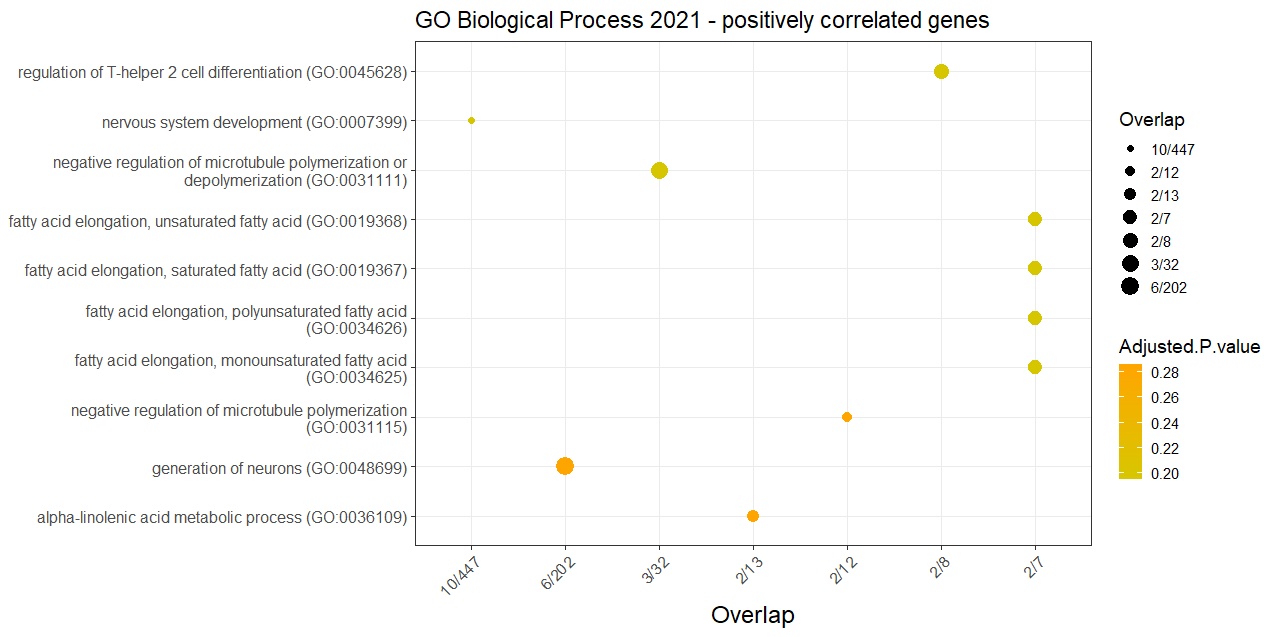

In [15]:
Image(filename='data/repetpos_control1.png')

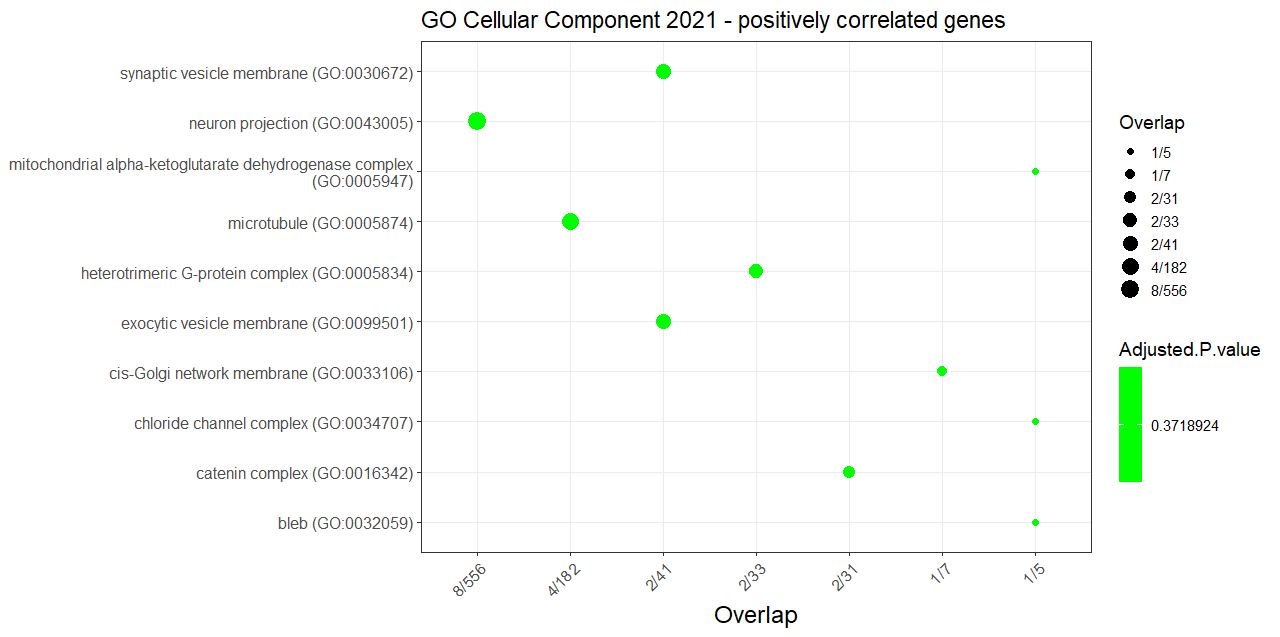

In [16]:
Image(filename='data/repetpos_control2.png')

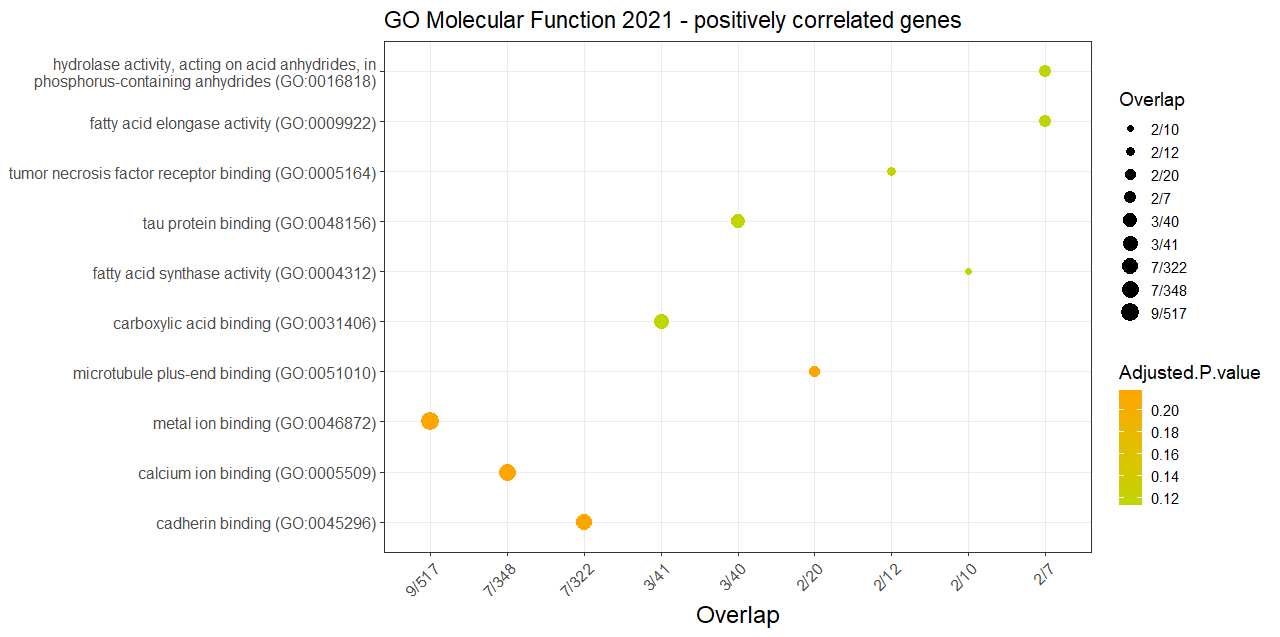

In [17]:
Image(filename='data/repetpos_control3.png')

# GO of Re-occurring negatively correlated genes

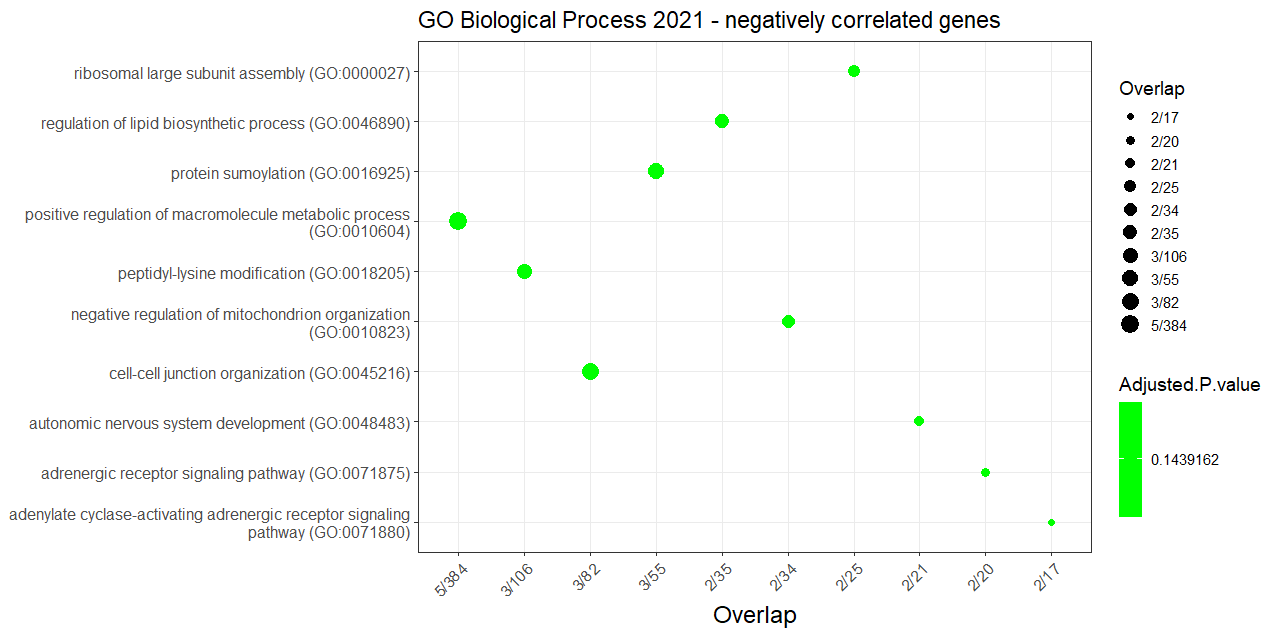

In [18]:
Image(filename='data/repetneg_control1.png')

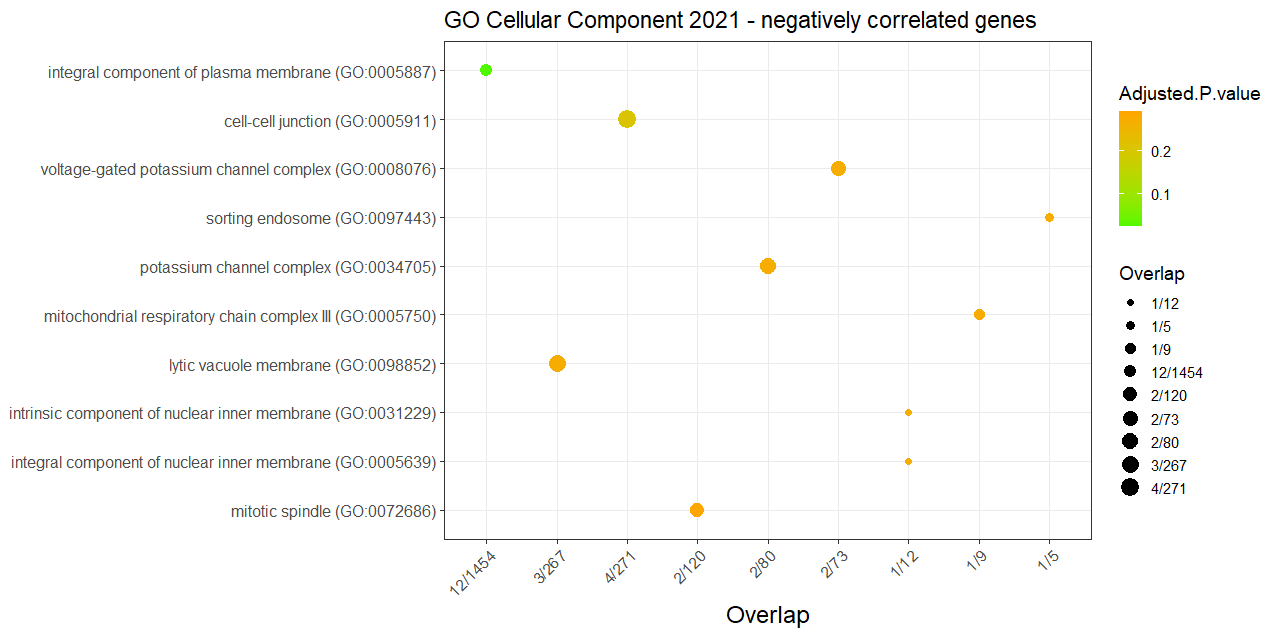

In [19]:
Image(filename='data/repetneg_control2.png')

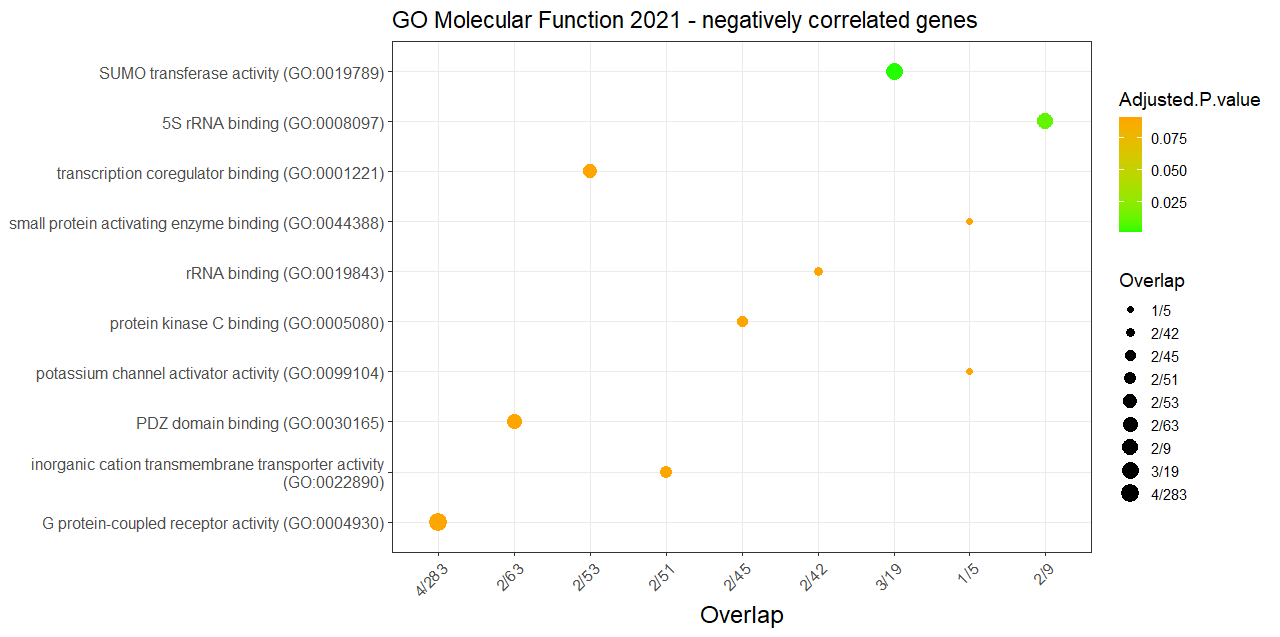

In [20]:
Image(filename='data/repetneg_control3.png')

# Do these re-occurring POSITIVELY correlated genes overlap w/ Differentially expressed genes associated with psychostimulants in brain

In [21]:
gene_list = open("data/brain.txt").read().split()  

In [22]:
all_genes=list(gene_exp.columns)[1:]#pop out my brain region column 
repets= repetpos
#repets=repetpos
count=0
for n in repets:
    if n in gene_list:
        count+=1
perc=100*count/len(repets)
statemt=str(round(perc,3))+' % of re-occurring highly-correlated genes (found via rabies vs gene exp) are ALSO in the list of Differentially expressed genes associated with psychostimulants in brain'
print(statemt)
count=0
for n in all_genes:
    if n in gene_list:
        count+=1
perc=100*count/len(all_genes)
statemt2=str(round(perc,3))+' % of genes in ISH data found in brain.txt'
print(statemt2)

82.857 % of re-occurring highly-correlated genes (found via rabies vs gene exp) are ALSO in the list of Differentially expressed genes associated with psychostimulants in brain
84.894 % of genes in ISH data found in brain.txt


# Compare above to chance

In [23]:
import random
samplenum= len(repets) #56 - number of genes to sample ^^ based on above repeats 
samplex=10 #sample x times
percs=[]
for n in range(samplex):
    repets=random.sample(all_genes, samplenum)
    count=0
    for n in repets:
        if n in gene_list:
            count+=1
    perc=100*count/len(repets)
    percs.append(perc)
perc=np.mean(percs)
statemt=str(round(perc,3))+' % of randomly sampled genes (found in our ISH data) are ALSO in the list of Differentially expressed genes associated with psychostimulants in brain'
print(statemt)

84.286 % of randomly sampled genes (found in our ISH data) are ALSO in the list of Differentially expressed genes associated with psychostimulants in brain


# Do these re-occurring NEGATIVELY correlated genes overlap w/ Differentially expressed genes associated with psychostimulants in brain

In [24]:
repets=repetneg#+repetpos
#repets=repetpos
count=0
for n in repets:
    if n in gene_list:
        count+=1
perc=100*count/len(repets)
statemt=str(round(perc,3))+' % of re-occurring highly-correlated genes (found via rabies vs gene exp) are ALSO in the list of Differentially expressed genes associated with psychostimulants in brain'
print(statemt)
print(statemt2)

79.245 % of re-occurring highly-correlated genes (found via rabies vs gene exp) are ALSO in the list of Differentially expressed genes associated with psychostimulants in brain
84.894 % of genes in ISH data found in brain.txt


# Compare above to chance

In [25]:
import random
samplenum= len(repets) #56 - number of genes to sample ^^ based on above repeats
all_genes=list(gene_exp.columns)[1:]#pop out my brain region column 
percs=[]
for n in range(samplex):
    repets=random.sample(all_genes, samplenum)
    count=0
    for n in repets:
        if n in gene_list:
            count+=1
    perc=100*count/len(repets)
    percs.append(perc)
perc=np.mean(percs)
statemt=str(round(perc,3))+' % of randomly sampled genes (found in our ISH data) are ALSO in the list of Differentially expressed genes associated with psychostimulants in brain'
print(statemt)

83.774 % of randomly sampled genes (found in our ISH data) are ALSO in the list of Differentially expressed genes associated with psychostimulants in brain


# Try correlation with subset of genes 

# Differentially expressed genes associated with psychostimulants in brain

brain.txt = Differentially expressed genes associated with psychostimulants in brain

dependence_GWAS.txt = Differentially expressed genes related to substance dependence of GWAS

Data downloaded from: 

http://159.226.67.237/sun/addictgedb/welcome/download.html

In [26]:
lst2=np.unique(gene_list)
lst1=gene_exp.columns #want return values of list 1 that are in list 2
lst3=list(set(lst1).intersection(lst2))

r_val: -0.016559953751311987
p_val: 0.9000619706603735


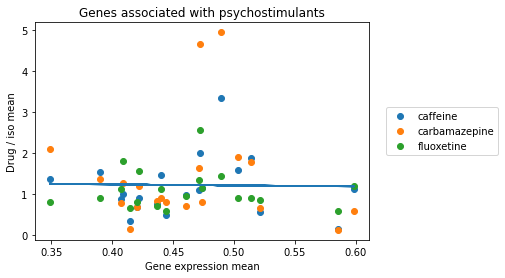

In [27]:
temp3=[]
temp4=[]
for drug in druglist:
    temp=note8[note8['drug']==drug]
    selectedgenes= gene_exp[lst3]
    temp=notedatas8[notedatas8['drug']==drug]['ratio_drugviso']
    temp1=list(selectedgenes.mean(axis=1))
    temp3=temp3+list(temp)
    temp4=temp4+list(temp1)
    plt.scatter(temp1,temp,label=drug)
plt.xlabel('Gene expression mean')
plt.ylabel('Drug / iso mean')
plt.title('Genes associated with psychostimulants')

#obtain m (slope) and b(intercept) of linear regression line
m, b, r_value, p_value, std_err = sp.stats.linregress(temp4, temp3)
#m, b = np.polyfit(temp1, temp, 1)
temp3 = [m*i+b  for i in list(temp4)]
#add linear regression line to scatterplot 
plt.plot(temp4, temp3)

plt.legend(loc="right",bbox_to_anchor=(1.4, 0.5)) 
plt.savefig("figures/notebook_11/controls-in27.svg")
print('r_val: '+str(r_value))
print('p_val: '+str(p_value))

# Try correlation with subset of genes 

# Differentially expressed genes related to substance dependence of GWAS

In [28]:
gene_list = open("data/dependence_GWAS.txt").read().split()
lst2=np.unique(gene_list)
for i,val in enumerate(lst2):
    lst2[i] =val.lower()
lst1=list(gene_exp.columns) #want return values of list 1 that are in list 2
for i,val in enumerate(lst1):
    lst1[i] =val.lower()
lst3=list(set(lst1).intersection(lst2))

In [29]:
gene_exp_lowercase=gene_exp.copy()
gene_exp_lowercase.columns = lst1

r_val: -0.040912642319299176
p_val: 0.7562784914991464


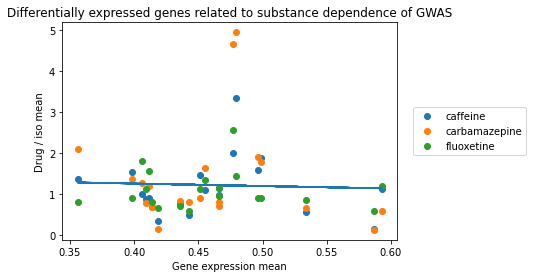

In [30]:
temp3=[]
temp4=[]
for drug in druglist:
    temp=note8[note8['drug']==drug]
    selectedgenes= gene_exp_lowercase[lst3]
    temp=notedatas8[notedatas8['drug']==drug]['ratio_drugviso']
    temp1=list(selectedgenes.mean(axis=1))
    temp3=temp3+list(temp)
    temp4=temp4+list(temp1)
    plt.scatter(temp1,temp,label=drug)
#obtain m (slope) and b(intercept) of linear regression line
m, b, r_value, p_value, std_err = sp.stats.linregress(temp4, temp3)
#m, b = np.polyfit(temp1, temp, 1)
temp3 = [m*i+b  for i in list(temp4)]
#add linear regression line to scatterplot 
plt.plot(temp4, temp3)

plt.xlabel('Gene expression mean')
plt.ylabel('Drug / iso mean')
plt.title('Differentially expressed genes related to substance dependence of GWAS')
plt.legend(loc="right",bbox_to_anchor=(1.4, 0.5)) 
print('r_val: '+str(r_value))
plt.savefig("figures/notebook_11/controls-in30.svg")
print('p_val: '+str(p_value))

# Try correlation with subset of genes 
 
# Neurotransmitter receptor related probes

Supplementary Table 3. https://doi.org/10.1016/j.neurobiolaging.2012.11.024

In [31]:
gene_list2 =pd.read_csv("data/neurotransmit_related_genes.csv")
gene_list=gene_list2['Gene']
lst2=np.unique(gene_list)
for i,val in enumerate(lst2):
    lst2[i] =val.lower()
lst1=list(gene_exp.columns) #want return values of list 1 that are in list 2
for i,val in enumerate(lst1):
    lst1[i] =val.lower()
lst3=list(set(lst1).intersection(lst2)) 
lst2

array(['chrm1', 'chrm3', 'chrna5', 'chrna7', 'chrnb1', 'chrnb2', 'chrnb3',
       'drd1', 'drd1ip', 'drd2', 'drd5', 'gabarap', 'gabarapl1',
       'gabarapl2', 'gabbr1', 'gabbr2', 'gabra1', 'gabra2', 'gabra3',
       'gabra4', 'gabra5', 'gabrb1', 'gabrb2', 'gabrb3', 'gabrd',
       'gabrg1', 'gabrg2', 'gabrg3', 'gabrr1', 'glrb', 'glul', 'gria1',
       'gria2', 'gria3', 'gria4', 'grik1', 'grik2', 'grik4', 'grik5',
       'grin1', 'grin2a', 'grin2b', 'grin2c', 'grm1', 'grm2', 'grm3',
       'grm4', 'grm5', 'grm7', 'grm8', 'hrh3', 'htr1e', 'htr1f', 'htr2a',
       'htr2c', 'htr3a', 'htr7'], dtype=object)

r_val: -0.254351450995828
p_val: 0.04986298421804304


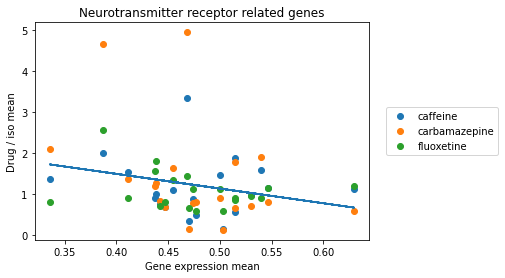

In [32]:
temp3=[]
temp4=[]
for drug in druglist:
    temp=note8[note8['drug']==drug]
    selectedgenes= gene_exp_lowercase[lst3]
    temp=notedatas8[notedatas8['drug']==drug]['ratio_drugviso']
    temp1=list(selectedgenes.mean(axis=1))
    temp3=temp3+list(temp)
    temp4=temp4+list(temp1)
    plt.scatter(temp1,temp,label=drug)
#obtain m (slope) and b(intercept) of linear regression line
m, b, r_value, p_value, std_err = sp.stats.linregress(temp4, temp3)
#m, b = np.polyfit(temp1, temp, 1)
temp3 = [m*i+b  for i in list(temp4)]
#add linear regression line to scatterplot 
plt.plot(temp4, temp3)

plt.xlabel('Gene expression mean')
plt.ylabel('Drug / iso mean')
plt.title('Neurotransmitter receptor related genes')
plt.legend(loc="right",bbox_to_anchor=(1.4, 0.5)) 
print('r_val: '+str(r_value))
print('p_val: '+str(p_value))
plt.savefig("figures/notebook_11/controls-in32.svg")

# Do these re-occurring POSITIVELY correlated genes overlap w/ Neurotransmitter receptor related probes

In [33]:
gene_list = open("data/dependence_GWAS.txt").read().split()
lst2=np.unique(gene_list)
for i,val in enumerate(lst2):
    lst2[i] =val.lower()
lst1=list(gene_exp.columns) #want return values of list 1 that are in list 2
for i,val in enumerate(lst1):
    lst1[i] =val.lower()
lst3=list(set(lst1).intersection(lst2))
gene_list=lst2
all_genes=lst1#pop out my brain region column 
repets= repetneg+repetpos 
for i,val in enumerate(repets):
    repets[i] =val.lower()
count=0
for n in repets:
    if n in gene_list:
        count+=1
perc=100*count/len(repets)
statemt=str(round(perc,3))+' % of re-occurring highly-correlated genes (found via rabies vs gene exp) are ALSO in the list of Neurotransmitter receptor related probes'
print(statemt)
count=0
for n in all_genes:
    if n in gene_list:
        count+=1
perc=100*count/len(all_genes)
statemt2=str(round(perc,3))+' % of genes in ISH data found in dependence_GWAS.txt'
print(statemt2)

13.636 % of re-occurring highly-correlated genes (found via rabies vs gene exp) are ALSO in the list of Neurotransmitter receptor related probes
15.079 % of genes in ISH data found in dependence_GWAS.txt


# Synapse-Related Genes

As identified here:

https://doi.org/10.3389/fnins.2020.00822
    
Supplementary table 2?

In [34]:
gene_list2 =pd.read_csv("data/Data_Sheet_2_A Panel of Synapse-Related Genes as a Biomarker for Gliomas.csv")
gene_list=gene_list2['symbol']
lst2=np.unique(gene_list)
for i,val in enumerate(lst2):
    lst2[i] =val.lower()
lst1=list(gene_exp.columns) #want return values of list 1 that are in list 2
for i,val in enumerate(lst1):
    lst1[i] =val.lower()
lst3=list(set(lst1).intersection(lst2))  
[s.capitalize() for s in lst2]

['Abhd12',
 'Abhd6',
 'Adora1',
 'Adora2a',
 'Adra1a',
 'Agrn',
 'Akt1',
 'App',
 'Arrb2',
 'Bcan',
 'C1qa',
 'Cacng2',
 'Cacng3',
 'Cacng4',
 'Cacng5',
 'Cacng7',
 'Cacng8',
 'Cadm3',
 'Cadps2',
 'Calb2',
 'Cbln1',
 'Cdk5',
 'Cdk5r1',
 'Chrna1',
 'Chrna10',
 'Chrna2',
 'Chrna3',
 'Chrna4',
 'Chrna5',
 'Chrna6',
 'Chrna7',
 'Chrna9',
 'Chrnb1',
 'Chrnb2',
 'Chrnb4',
 'Chrnd',
 'Chrne',
 'Cnih2',
 'Cnih3',
 'Cntn6',
 'Cpeb4',
 'Cpt1c',
 'Ctnna2',
 'Ctnnb1',
 'Ctnnd2',
 'Cx3cr1',
 'Dgki',
 'Dlg3',
 'Dlg4',
 'Drd2',
 'Drp2',
 'Dvl1',
 'Elfn1',
 'Flot1',
 'Ghrl',
 'Glra1',
 'Glra2',
 'Glra3',
 'Glra4',
 'Glrb',
 'Gria1',
 'Gria2',
 'Gria3',
 'Gria4',
 'Grid1',
 'Grid2',
 'Grik1',
 'Grik2',
 'Grik3',
 'Grik4',
 'Grik5',
 'Grin1',
 'Grin2a',
 'Grin2b',
 'Grin2c',
 'Grin2d',
 'Grin3a',
 'Grin3b',
 'Grm5',
 'Gsg1l',
 'Gsk3a',
 'Gsk3b',
 'Igsf21',
 'Kcnj3',
 'Kcnj9',
 'L1cam',
 'Lrp4',
 'Lrrk2',
 'Lrrtm1',
 'Lrrtm2',
 'Mapk8ip2',
 'Mapt',
 'Mecp2',
 'Mef2c',
 'Mink1',
 'Mpp2',
 'Myo5a',
 'Myot'

r_val: -0.16567882004931558
p_val: 0.20583173081519862


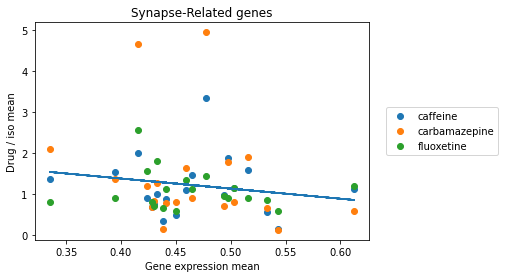

In [35]:
temp3=[]
temp4=[]
for drug in druglist:
    temp=note8[note8['drug']==drug]
    selectedgenes= gene_exp_lowercase[lst3]
    temp=notedatas8[notedatas8['drug']==drug]['ratio_drugviso']
    temp1=list(selectedgenes.mean(axis=1))
    temp3=temp3+list(temp)
    temp4=temp4+list(temp1)
    plt.scatter(temp1,temp,label=drug)
#obtain m (slope) and b(intercept) of linear regression line
m, b, r_value, p_value, std_err = sp.stats.linregress(temp4, temp3)
#m, b = np.polyfit(temp1, temp, 1)
temp3 = [m*i+b  for i in list(temp4)]
#add linear regression line to scatterplot 
plt.plot(temp4, temp3)

plt.xlabel('Gene expression mean')
plt.ylabel('Drug / iso mean')
plt.title('Synapse-Related genes')
plt.legend(loc="right",bbox_to_anchor=(1.4, 0.5)) 
print('r_val: '+str(r_value))
print('p_val: '+str(p_value))
plt.savefig("figures/notebook_11/controls-in35.svg")

In [36]:
gene_list=gene_list2['symbol']
lst2=np.unique(gene_list)
for i,val in enumerate(lst2):
    lst2[i] =val.lower()
lst1=list(gene_exp.columns) #want return values of list 1 that are in list 2
for i,val in enumerate(lst1):
    lst1[i] =val.lower()
lst3=list(set(lst1).intersection(lst2))
gene_list=lst2
all_genes=lst1#pop out my brain region column 
repets= repetneg+repetpos 
count=0
for i,val in enumerate(repets):
    repets[i] =val.lower()
for n in repets:
    if n in gene_list:
        count+=1
perc=100*count/len(repets)
statemt=str(round(perc,3))+' % of re-occurring highly-correlated genes (found via rabies vs gene exp) are ALSO in the list of Synapse-Related genes'
print(statemt)
count=0
for n in all_genes:
    if n in gene_list:
        count+=1
perc=100*count/len(all_genes)
statemt2=str(round(perc,3))+' % of genes in ISH data found in Synapse-Related genes'
print(statemt2)

2.273 % of re-occurring highly-correlated genes (found via rabies vs gene exp) are ALSO in the list of Synapse-Related genes
2.614 % of genes in ISH data found in Synapse-Related genes


# Find sets of genes related to: exo/endocytosis, cellular excitability, ion channels

# Ion channels - limited, based on paper

Gene list from:

https://doi.org/10.1038/srep11593

In [37]:
gene_list2 =pd.read_csv("data/ion_channel_genes.csv")

In [38]:
gene_list=gene_list2['symbol']
lst2=np.unique(gene_list)
for i,val in enumerate(lst2):
    lst2[i] =val.lower()
lst1=list(gene_exp.columns) #want return values of list 1 that are in list 2
for i,val in enumerate(lst1):
    lst1[i] =val.lower()
lst3=list(set(lst1).intersection(lst2)) 

r_val: -0.33804048830255246
p_val: 0.008250877456861644


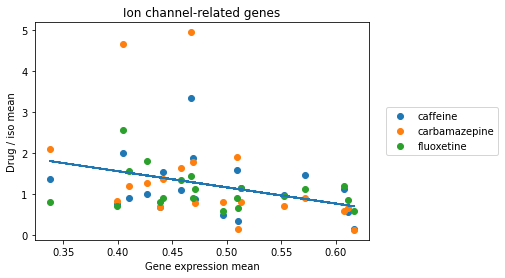

In [39]:
temp3=[]
temp4=[]
for drug in druglist:
    temp=note8[note8['drug']==drug]
    selectedgenes= gene_exp_lowercase[lst3]
    temp=notedatas8[notedatas8['drug']==drug]['ratio_drugviso']
    temp1=list(selectedgenes.mean(axis=1))
    temp3=temp3+list(temp)
    temp4=temp4+list(temp1)
    plt.scatter(temp1,temp,label=drug)
#obtain m (slope) and b(intercept) of linear regression line
m, b, r_value, p_value, std_err = sp.stats.linregress(temp4, temp3)
#m, b = np.polyfit(temp1, temp, 1)
temp3 = [m*i+b  for i in list(temp4)]
#add linear regression line to scatterplot 
plt.plot(temp4, temp3)

plt.xlabel('Gene expression mean')
plt.ylabel('Drug / iso mean')
plt.title('Ion channel-related genes')
plt.legend(loc="right",bbox_to_anchor=(1.4, 0.5)) 
print('r_val: '+str(r_value))
print('p_val: '+str(p_value))
plt.savefig("figures/notebook_11/controls-in39.svg")

In [40]:
gene_list=lst2
all_genes=lst1#pop out my brain region column 
repets= repetneg+repetpos 
for i,val in enumerate(repets):
    repets[i] =val.lower()
count=0
for n in repets:
    if n in gene_list:
        count+=1
perc=100*count/len(repets)
statemt=str(round(perc,3))+' % of re-occurring highly-correlated genes (found via rabies vs gene exp) are ALSO in the list of Ion channel-related genes'
print(statemt)
count=0
for n in all_genes:
    if n in gene_list:
        count+=1
perc=100*count/len(all_genes)
statemt2=str(round(perc,3))+' % of genes in ISH data found in Ion channel-related genes'
print(statemt2) 

0.0 % of re-occurring highly-correlated genes (found via rabies vs gene exp) are ALSO in the list of Ion channel-related genes
0.444 % of genes in ISH data found in Ion channel-related genes


# Defining a function to do above...

In [41]:
def print_and_plot(gene_list,title_info,plot_individual='ye'):
    lst2=np.unique(gene_list)
    for i,val in enumerate(lst2):
        lst2[i] =val.lower()
    lst1=list(gene_exp.columns) #want return values of list 1 that are in list 2
    for i,val in enumerate(lst1):
        lst1[i] =val.lower()
    lst3=list(set(lst1).intersection(lst2)) 
    temp3=[]
    temp4=[]
    for drug in druglist:
        temp=note8[note8['drug']==drug]
        selectedgenes= gene_exp_lowercase[lst3]
        temp=notedatas8[notedatas8['drug']==drug]['ratio_drugviso']
        temp1=list(selectedgenes.mean(axis=1))
        temp3=temp3+list(temp)
        temp4=temp4+list(temp1)
        plt.scatter(temp1,temp,label=drug)
    #obtain m (slope) and b(intercept) of linear regression line
    m, b, r_value, p_value, std_err = sp.stats.linregress(temp4, temp3)
    #m, b = np.polyfit(temp1, temp, 1)
    temp3 = [m*i+b  for i in list(temp4)]
    #add linear regression line to scatterplot 
    plt.plot(temp4, temp3)
    plt_title=title_info
    plt.xlabel('Gene expression mean')
    plt.ylabel('Drug / iso mean')
    plt.title(plt_title)
    plt.legend(loc="right",bbox_to_anchor=(1.4, 0.5))
    title2="figures/notebook_11/controls-"+title_info+".svg"
    plt.savefig(title2)
    plt.show() 
    #calcs
    gene_list=lst2
    all_genes=lst1#pop out my brain region column 
    repets= repetneg+repetpos 
    for i,val in enumerate(repets):
        repets[i] =val.lower()
    count=0
    for n in repets:
        if n in gene_list:
            count+=1
    perc=100*count/len(repets)
    statemt=str(round(perc,3))+' % of re-occurring highly-correlated genes (found via rabies vs gene exp) are ALSO in '+title_info
    print(statemt)
    count=0
    for n in all_genes:
        if n in gene_list:
            count+=1
    perc=100*count/len(all_genes)
    statemt2=str(round(perc,3))+' % of genes in ISH data found in '+title_info
    print(statemt2) 

    print('  ')
    print('r_val: '+str(r_value))
    print('p_val: '+str(p_value)) # (guidetopharmacology - all)
    if plot_individual == 'no':
        print(' ')
    else:
        for drug in druglist:
            temp3=[]
            temp4=[]
            temp=note8[note8['drug']==drug]
            selectedgenes= gene_exp_lowercase[lst3]
            temp=notedatas8[notedatas8['drug']==drug]['ratio_drugviso']
            temp1=list(selectedgenes.mean(axis=1))
            temp3=temp3+list(temp)
            temp4=temp4+list(temp1)
            m, b, r_value, p_value, std_err = sp.stats.linregress(temp4, temp3)
            temp3 = [m*i+b  for i in list(temp4)]
            plt.plot(temp4, temp3)
            plt.scatter(temp1,temp,label=drug)
            plt.xlabel('Gene expression mean')
            plt.ylabel('Drug / iso mean')
            plt.title(title_info+' - '+drug)
            plt.legend(loc="right",bbox_to_anchor=(1.4, 0.5)) 
            for i, txt in enumerate(regions):
                plt.annotate(txt, (temp1[i], temp[i]))
            title2="figures/notebook_11/controls-"+title_info+"-"+drug+".svg"
            plt.savefig(title2)
            plt.show()
            print('r_val: '+str(r_value))
            print('p_val: '+str(p_value)) # (guidetopharmacology - all)

In [42]:
reglist1=['LHA']
regions2=list(regions[0:10])+reglist1+list(regions[13:20]) 

In [43]:
gene_exp_lowercase2 = gene_exp_lowercase[gene_exp_lowercase.brain_region2 != 'LH']
gene_exp_lowercase2 = gene_exp_lowercase2[gene_exp_lowercase2.brain_region2 != 'MH']
dataas=list(gene_exp_lowercase2.columns)
d = {'gene_symbol': dataas}
df = pd.DataFrame(data=d)
df.to_csv('data/all_genes_low.csv')

In [44]:
notedatas82=notedatas8[notedatas8.brain_region2 != 'LH']
notedatas82=notedatas82[notedatas82.brain_region2 != 'MH']

In [45]:
def print_and_plot2(gene_list,title_info,plot_individual='yeo'):
    lst2=np.unique(gene_list)
    for i,val in enumerate(lst2):
        lst2[i] =val.lower()
    lst1=list(gene_exp.columns) #want return values of list 1 that are in list 2
    for i,val in enumerate(lst1):
        lst1[i] =val.lower()
    lst3=list(set(lst1).intersection(lst2)) 
    temp3=[]
    temp4=[]
    for drug in druglist:
        temp=note8[note8['drug']==drug]
        selectedgenes= gene_exp_lowercase2[lst3]
        temp=notedatas82[notedatas82['drug']==drug]['ratio_drugviso']
        temp1=list(selectedgenes.mean(axis=1))
        temp3=temp3+list(temp)
        temp4=temp4+list(temp1)
        plt.scatter(temp1,temp,label=drug)
    #obtain m (slope) and b(intercept) of linear regression line
    m, b, r_value, p_value, std_err = sp.stats.linregress(temp4, temp3)
    #m, b = np.polyfit(temp1, temp, 1)
    temp3 = [m*i+b  for i in list(temp4)]
    #add linear regression line to scatterplot 
    plt.plot(temp4, temp3)
    plt_title=title_info
    plt.xlabel('Gene expression mean')
    plt.ylabel('Drug / iso mean')
    plt.title(plt_title)
    plt.legend(loc="right",bbox_to_anchor=(1.4, 0.5)) 
    title2="figures/notebook_11/controls-"+title_info+".svg"
    plt.savefig(title2)
    plt.show()
    if plot_individual == 'no':
        print(' ')
    else:
        for drug in druglist:
            temp=note8[note8['drug']==drug]
            selectedgenes= gene_exp_lowercase[lst3]
            temp=notedatas82[notedatas82['drug']==drug]['ratio_drugviso']
            temp1=list(selectedgenes.mean(axis=1))
            temp3=temp3+list(temp)
            temp4=temp4+list(temp1)
            plt.scatter(temp1,temp,label=drug)
            plt.xlabel('Gene expression mean')
            plt.ylabel('Drug / iso mean')
            plt.title(title_info+' - '+drug)
            plt.legend(loc="right",bbox_to_anchor=(1.4, 0.5)) 
            for i, txt in enumerate(regions2):
                plt.annotate(txt, (temp1[i], temp[i]))
            title2="figures/notebook_11/controls-"+title_info+"-"+drug+".svg"
            plt.savefig(title2)
            plt.show()
    #calcs
    gene_list=lst2
    all_genes=lst1#pop out my brain region column 
    repets= repetneg+repetpos 
    for i,val in enumerate(repets):
        repets[i] =val.lower()
    count=0
    for n in repets:
        if n in gene_list:
            count+=1
    perc=100*count/len(repets)
    statemt=str(round(perc,3))+' % of re-occurring highly-correlated genes (found via rabies vs gene exp) are ALSO in '+title_info
    print(statemt)
    count=0
    for n in all_genes:
        if n in gene_list:
            count+=1
    perc=100*count/len(all_genes)
    statemt2=str(round(perc,3))+' % of genes in ISH data found in '+title_info
    print(statemt2) 

    print('  ')
    print('r_val: '+str(r_value))
    print('p_val: '+str(p_value)) # (guidetopharmacology - all)

# Ion channels - ALL from guidetopharmacology.org

voltage gated ion channels AND

ligand gated ion channels AND 

other ion channels

Gene list from:

https://www.guidetopharmacology.org/GRAC/IonChannelListForward?class=VGIC

In [46]:
gene_list2 =pd.read_csv("data/targets_and_families.csv")

In [47]:
l1=list(gene_list2[gene_list2['Type']=='vgic']['MGI symbol']) # voltage gated ion channels
l2=list(gene_list2[gene_list2['Type']=='lgic']['MGI symbol']) # ligand gated ion channels
l3=list(gene_list2[gene_list2['Type']=='other_ic']['MGI symbol']) # other ion channels 

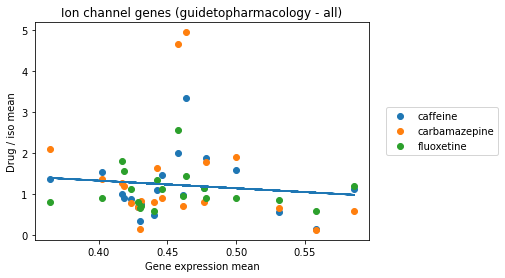

4.545 % of re-occurring highly-correlated genes (found via rabies vs gene exp) are ALSO in Ion channel genes (guidetopharmacology - all)
3.268 % of genes in ISH data found in Ion channel genes (guidetopharmacology - all)
  
r_val: -0.10982325867019219
p_val: 0.4035357869820292


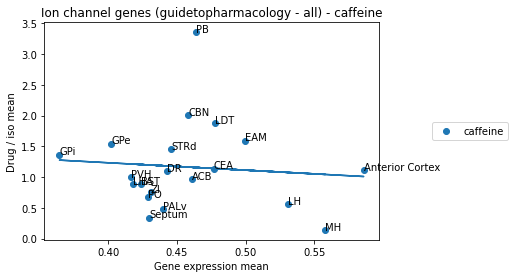

r_val: -0.08961544371967027
p_val: 0.707121811668024


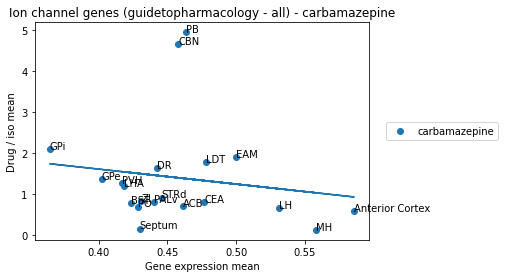

r_val: -0.1515316470682195
p_val: 0.5236463982357743


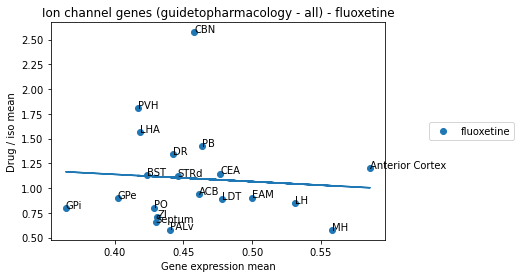

r_val: -0.08058572736086016
p_val: 0.735562956610676


In [48]:
gene_list=l1+l2+l3
title_info='Ion channel genes (guidetopharmacology - all)'
print_and_plot(gene_list,title_info)

# Ion channels - ONLY voltage gated ion channels from guidetopharmacology.org

voltage gated ion channels ONLY

Gene list from:

https://www.guidetopharmacology.org/GRAC/IonChannelListForward?class=VGIC

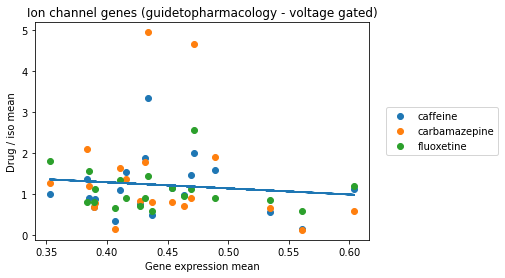

2.273 % of re-occurring highly-correlated genes (found via rabies vs gene exp) are ALSO in Ion channel genes (guidetopharmacology - voltage gated)
1.354 % of genes in ISH data found in Ion channel genes (guidetopharmacology - voltage gated)
  
r_val: -0.10525471084808344
p_val: 0.4234931990694796


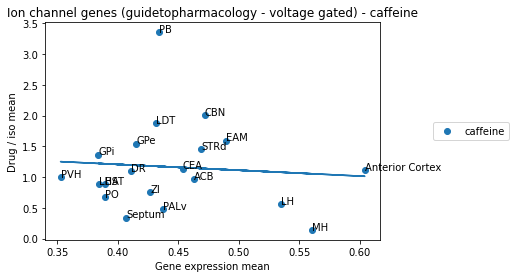

r_val: -0.08459809797476504
p_val: 0.7228816769929431


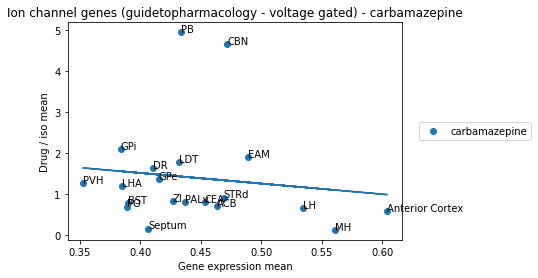

r_val: -0.12836299249980962
p_val: 0.5896568732796262


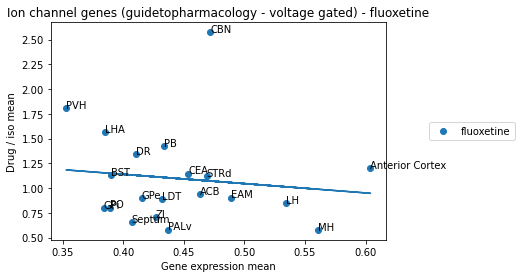

r_val: -0.12440302085176091
p_val: 0.6012792073047253


In [49]:
gene_list=l1
title_info='Ion channel genes (guidetopharmacology - voltage gated)'
print_and_plot(gene_list,title_info)

# Ion channels - ONLY ligand gated ion channels from guidetopharmacology.org

ligand gated ion channels ONLY

Gene list from:

https://www.guidetopharmacology.org/GRAC/IonChannelListForward?class=VGIC

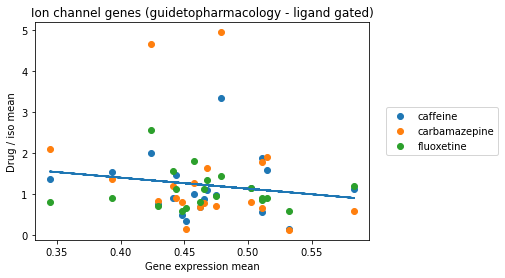

2.273 % of re-occurring highly-correlated genes (found via rabies vs gene exp) are ALSO in Ion channel genes (guidetopharmacology - ligand gated)
1.564 % of genes in ISH data found in Ion channel genes (guidetopharmacology - ligand gated)
  
r_val: -0.1556894543971976
p_val: 0.23489003610226067


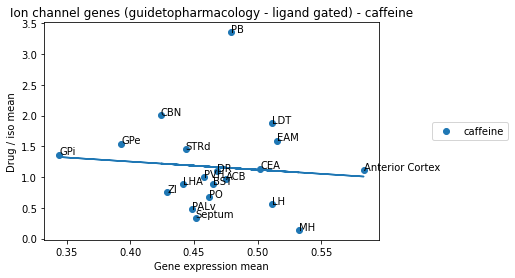

r_val: -0.09655616375063965
p_val: 0.6855093941165464


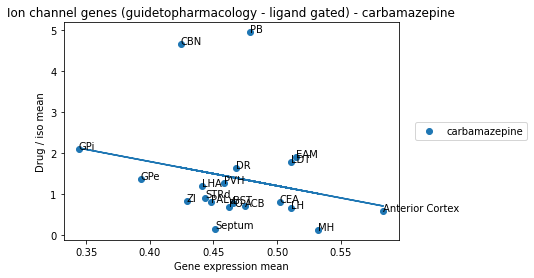

r_val: -0.23950878177717475
p_val: 0.30913012978652826


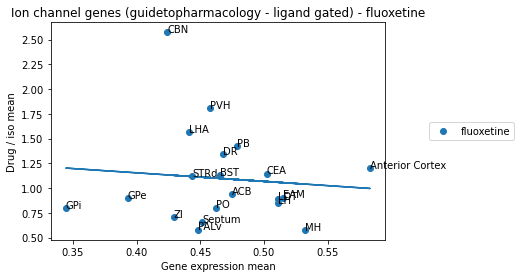

r_val: -0.09334248468066147
p_val: 0.6954882958032444


In [50]:
gene_list=l2 
title_info='Ion channel genes (guidetopharmacology - ligand gated)'
print_and_plot(gene_list,title_info)

# Ion channels - ONLY other ion channels from guidetopharmacology.org

other ion channels ONLY

Gene list from:

https://www.guidetopharmacology.org/GRAC/IonChannelListForward?class=VGIC

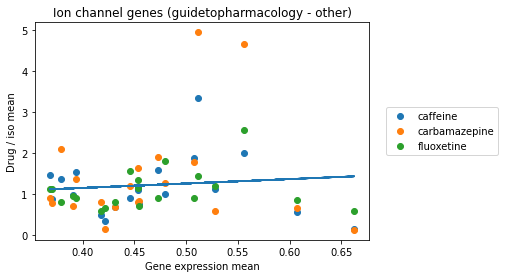

0.0 % of re-occurring highly-correlated genes (found via rabies vs gene exp) are ALSO in Ion channel genes (guidetopharmacology - other)
0.35 % of genes in ISH data found in Ion channel genes (guidetopharmacology - other)
  
r_val: 0.09436435099078624
p_val: 0.4732694164690031


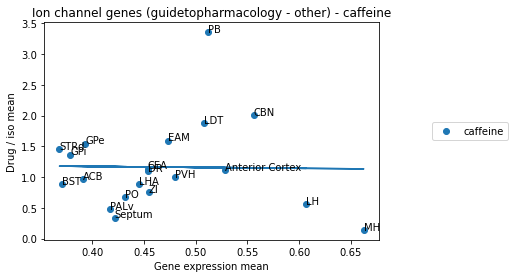

r_val: -0.016605397532006225
p_val: 0.9446041100939244


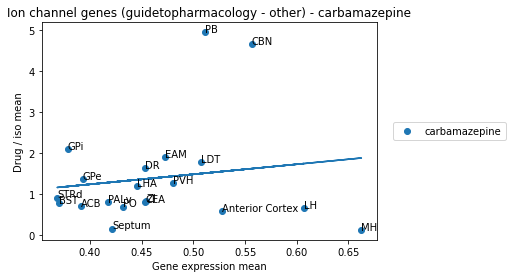

r_val: 0.15031308037856286
p_val: 0.5270297253798408


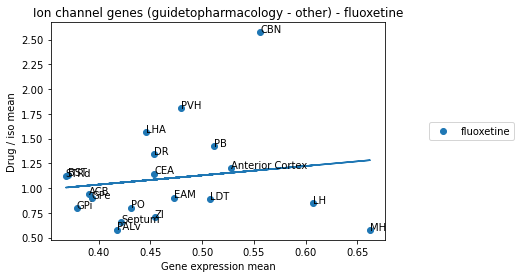

r_val: 0.15453714603107707
p_val: 0.5153454705131586


In [51]:
gene_list=l3
title_info='Ion channel genes (guidetopharmacology - other)'
print_and_plot(gene_list,title_info)

# Ion channels BY ION TYPE - from guidetopharmacology.org

# Potassium channels

Number of genes: 78


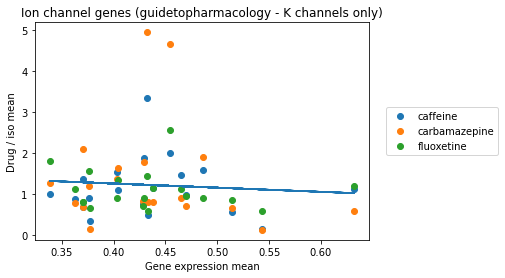

0.0 % of re-occurring highly-correlated genes (found via rabies vs gene exp) are ALSO in Ion channel genes (guidetopharmacology - K channels only)
0.957 % of genes in ISH data found in Ion channel genes (guidetopharmacology - K channels only)
  
r_val: -0.07883106614328719
p_val: 0.5493658590441828


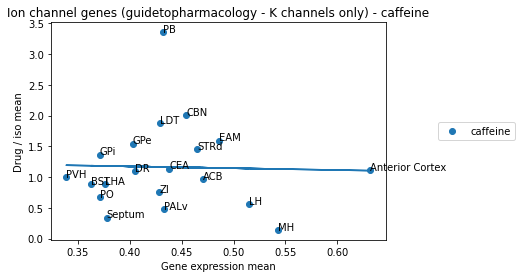

r_val: -0.029283969190183282
p_val: 0.9024594979924699


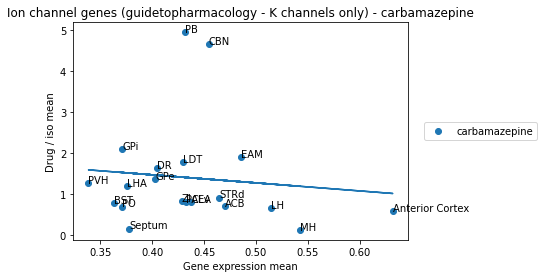

r_val: -0.1072919646965344
p_val: 0.6525430308898504


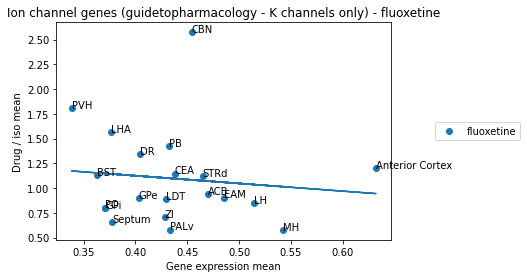

r_val: -0.1139394442409596
p_val: 0.6324326648532629


In [52]:
string1 = list(gene_list2[gene_list2['Type']=='vgic']['Family name'])
string2 = list(gene_list2[gene_list2['Type']=='lgic']['Family name']) 
string3 = list(gene_list2[gene_list2['Type']=='other_ic']['Family name'])
strings=string1+string2+string3
substring = "potassium channel"
channel = [string for string in strings if substring in string]
channels = gene_list2[gene_list2['Family name'].isin(channel)]
gene_list=list(channels['MGI symbol'])
print('Number of genes: '+str(len(gene_list)))
title_info='Ion channel genes (guidetopharmacology - K channels only)'
print_and_plot(gene_list,title_info)

# Ion channels BY ION TYPE - from guidetopharmacology.org

# Calcium channels

Number of genes: 20


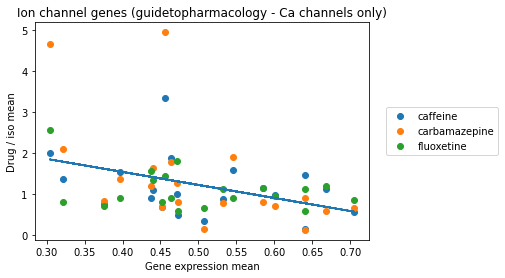

0.0 % of re-occurring highly-correlated genes (found via rabies vs gene exp) are ALSO in Ion channel genes (guidetopharmacology - Ca channels only)
0.093 % of genes in ISH data found in Ion channel genes (guidetopharmacology - Ca channels only)
  
r_val: -0.3982049040625214
p_val: 0.0016270041679272886


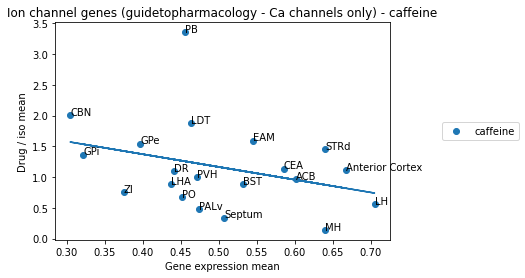

r_val: -0.3271041977222516
p_val: 0.15920764992902076


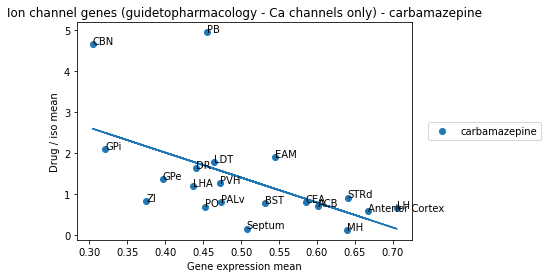

r_val: -0.5358805544668973
p_val: 0.014876062111336156


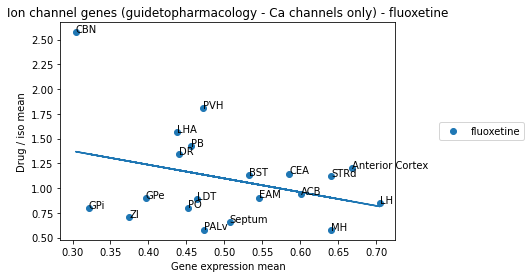

r_val: -0.32533091377950324
p_val: 0.16161424048326814


In [53]:
substring = "calcium channel" # also CatSper and Two-Pore channels
channel = [string for string in strings if substring in string]
channels = gene_list2[gene_list2['Family name'].isin(channel)]
 
substring = "CatSper and Two-Pore channel"
channel2 = [string for string in strings if substring in string]
channels2 = gene_list2[gene_list2['Family name'].isin(channel)]

gene_list=list(channels['MGI symbol'])+list(channels2['MGI symbol']) 
print('Number of genes: '+str(len(gene_list)))
title_info='Ion channel genes (guidetopharmacology - Ca channels only)'
print_and_plot(gene_list,title_info,plot_individual='yes')

In [54]:
gene_list

['Cacna1s',
 'Cacna1c',
 'Cacna1d',
 'Cacna1f',
 'Cacna1a',
 'Cacna1b',
 'Cacna1e',
 'Cacna1g',
 'Cacna1h',
 'Cacna1i',
 'Cacna1s',
 'Cacna1c',
 'Cacna1d',
 'Cacna1f',
 'Cacna1a',
 'Cacna1b',
 'Cacna1e',
 'Cacna1g',
 'Cacna1h',
 'Cacna1i']

# Ion channels BY ION TYPE - from guidetopharmacology.org

# Sodium channels

Number of genes: 14


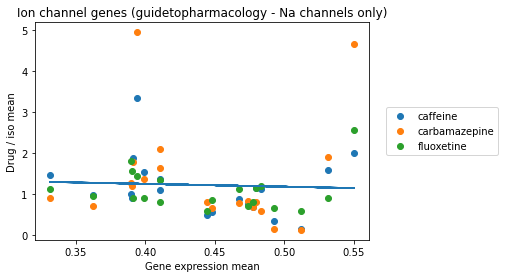

0.0 % of re-occurring highly-correlated genes (found via rabies vs gene exp) are ALSO in Ion channel genes (guidetopharmacology - Na channels only)
0.093 % of genes in ISH data found in Ion channel genes (guidetopharmacology - Na channels only)
  
r_val: -0.04475362139694492
p_val: 0.7342045429125252


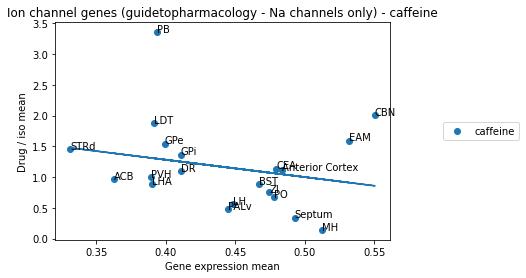

r_val: -0.23280674464415355
p_val: 0.3232676272802508


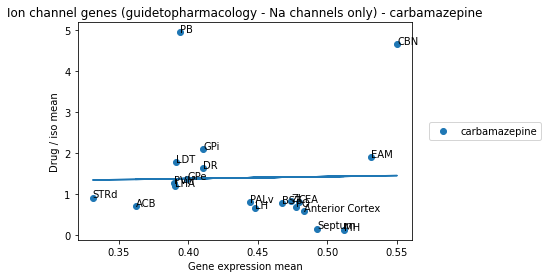

r_val: 0.022592616246005358
p_val: 0.9246777715553736


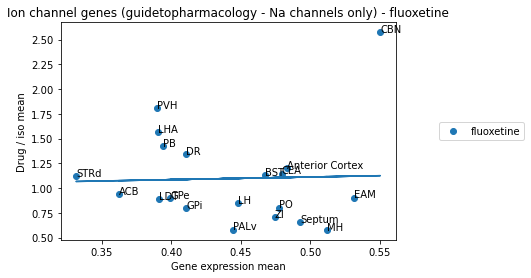

r_val: 0.03287094864161974
p_val: 0.8905767861821234


In [55]:
substring = "sodium channel" 
channel = [string for string in strings if substring in string]
channels = gene_list2[gene_list2['Family name'].isin(channel)]
gene_list=list(channels['MGI symbol'])
print('Number of genes: '+str(len(gene_list)))
title_info='Ion channel genes (guidetopharmacology - Na channels only)'
print_and_plot(gene_list,title_info)

# Ion channels BY ION TYPE - from guidetopharmacology.org

# Chloride channels

Number of genes: 6


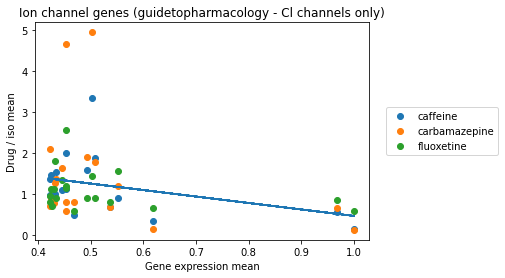

0.0 % of re-occurring highly-correlated genes (found via rabies vs gene exp) are ALSO in Ion channel genes (guidetopharmacology - Cl channels only)
0.023 % of genes in ISH data found in Ion channel genes (guidetopharmacology - Cl channels only)
  
r_val: -0.2914531310818607
p_val: 0.02385896967197049


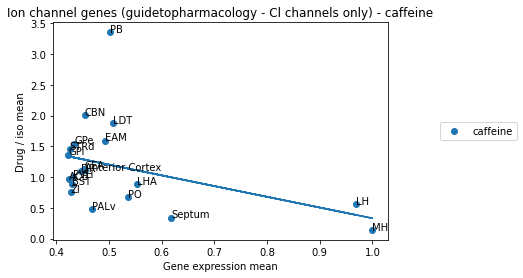

r_val: -0.4063287670696362
p_val: 0.07544180315524471


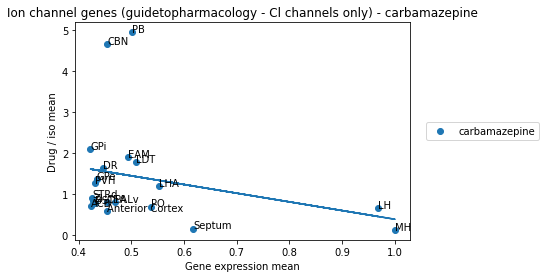

r_val: -0.2745509199003845
p_val: 0.24141745477251525


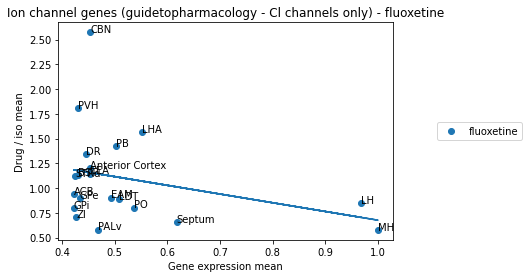

r_val: -0.3055223644797216
p_val: 0.19021398652886395


In [56]:
substring = "chloride channel"
channel = [string for string in strings if substring in string]
channels = gene_list2[gene_list2['Family name'].isin(channel)]
substring = "CIC family"
channel2 = [string for string in strings if substring in string]
channels2 = gene_list2[gene_list2['Family name'].isin(channel)]

gene_list=list(channels['MGI symbol'])+list(channels2['MGI symbol'])
print('Number of genes: '+str(len(gene_list)))
title_info='Ion channel genes (guidetopharmacology - Cl channels only)'
print_and_plot(gene_list,title_info,plot_individual='yes')

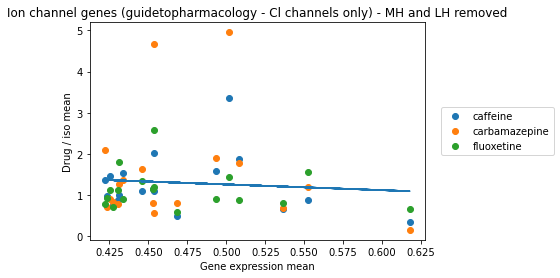

 
0.0 % of re-occurring highly-correlated genes (found via rabies vs gene exp) are ALSO in Ion channel genes (guidetopharmacology - Cl channels only) - MH and LH removed
0.023 % of genes in ISH data found in Ion channel genes (guidetopharmacology - Cl channels only) - MH and LH removed
  
r_val: -0.0829248519522659
p_val: 0.551081467933935


In [57]:
title_info='Ion channel genes (guidetopharmacology - Cl channels only) - MH and LH removed'
print_and_plot2(gene_list,title_info,plot_individual='no')

# Ion channels BY TYPE - from guidetopharmacology.org

# Glycine receptors

Number of genes: 6


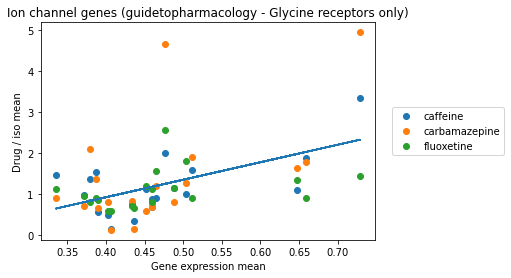

0.0 % of re-occurring highly-correlated genes (found via rabies vs gene exp) are ALSO in Ion channel genes (guidetopharmacology - Glycine receptors only)
0.117 % of genes in ISH data found in Ion channel genes (guidetopharmacology - Glycine receptors only)
  
r_val: 0.48478046999459307
p_val: 8.664154638382054e-05


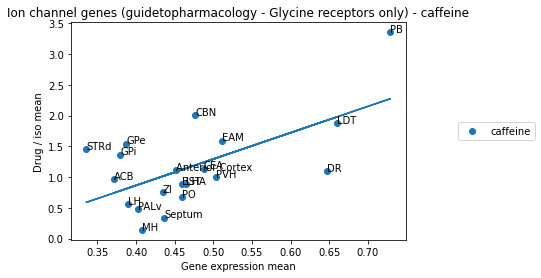

r_val: 0.6139718140341339
p_val: 0.003980421204733369


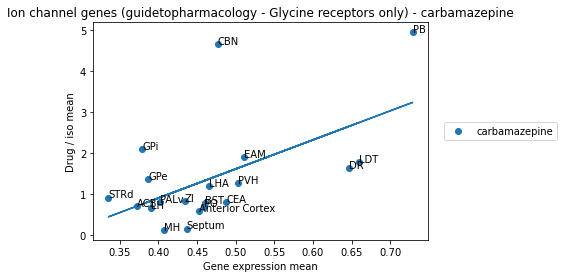

r_val: 0.5651571786732702
p_val: 0.009413652111501974


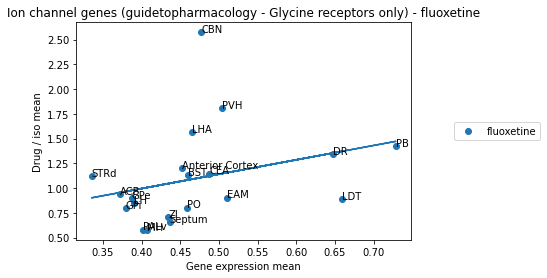

r_val: 0.30915020545714417
p_val: 0.18473783142266864


In [58]:
substring = "Glycine receptors"
channel = [string for string in strings if substring in string]
channels = gene_list2[gene_list2['Family name'].isin(channel)] 

gene_list=list(channels['MGI symbol']) 
print('Number of genes: '+str(len(gene_list)))
title_info='Ion channel genes (guidetopharmacology - Glycine receptors only)'
print_and_plot(gene_list,title_info,plot_individual='yes')

# Ion channels BY TYPE - from guidetopharmacology.org

# Glutamate receptors

Number of genes: 18


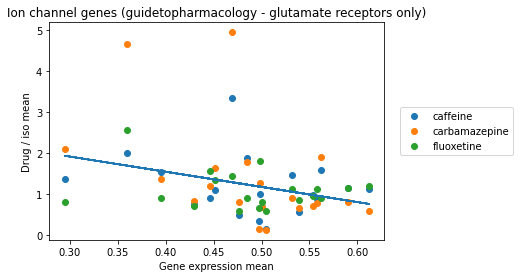

1.136 % of re-occurring highly-correlated genes (found via rabies vs gene exp) are ALSO in Ion channel genes (guidetopharmacology - glutamate receptors only)
0.42 % of genes in ISH data found in Ion channel genes (guidetopharmacology - glutamate receptors only)
  
r_val: -0.32004426329837343
p_val: 0.01267221667277154


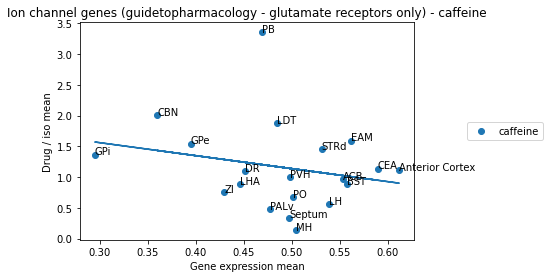

r_val: -0.23001139635239656
p_val: 0.3292760958391949


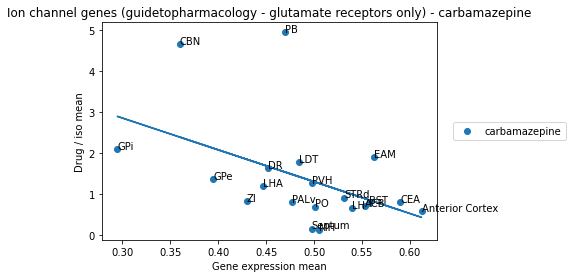

r_val: -0.4711632078736024
p_val: 0.035996012917427836


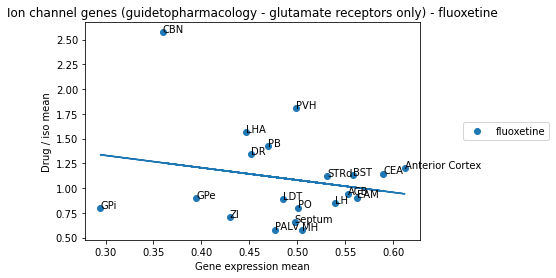

r_val: -0.20182334135041116
p_val: 0.39349511871375986


In [59]:
substring = "glutamate receptor"
channel = [string for string in strings if substring in string]
channels = gene_list2[gene_list2['Family name'].isin(channel)] 

gene_list=list(channels['MGI symbol']) 
print('Number of genes: '+str(len(gene_list)))
title_info='Ion channel genes (guidetopharmacology - glutamate receptors only)'
print_and_plot(gene_list,title_info)

# Ion channels BY TYPE - from guidetopharmacology.org

# Acetylcholine receptors

Number of genes: 17


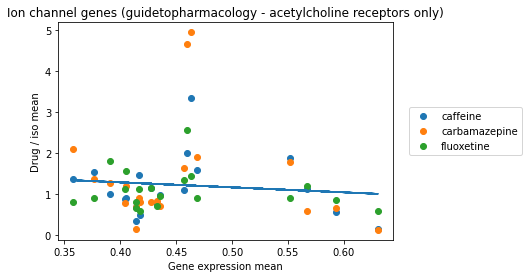

0.0 % of re-occurring highly-correlated genes (found via rabies vs gene exp) are ALSO in Ion channel genes (guidetopharmacology - acetylcholine receptors only)
0.327 % of genes in ISH data found in Ion channel genes (guidetopharmacology - acetylcholine receptors only)
  
r_val: -0.1006036909980734
p_val: 0.44437668456616153


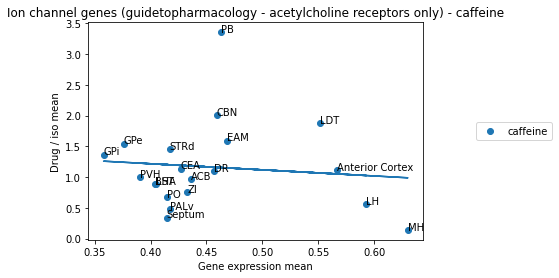

r_val: -0.10323488859401132
p_val: 0.6649322674008162


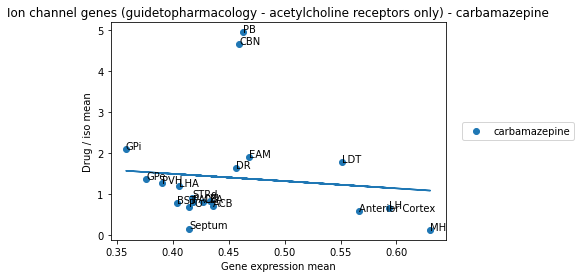

r_val: -0.1027115624553445
p_val: 0.6665365575113382


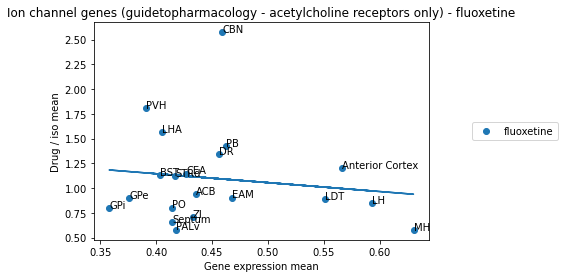

r_val: -0.13922626333525198
p_val: 0.5582717112698363


In [60]:
substring = "acetylcholine receptor"
channel = [string for string in strings if substring in string]
channels = gene_list2[gene_list2['Family name'].isin(channel)] 

gene_list=list(channels['MGI symbol']) 
print('Number of genes: '+str(len(gene_list)))
title_info='Ion channel genes (guidetopharmacology - acetylcholine receptors only)'
print_and_plot(gene_list,title_info)

# GABA receptor genes

from https://www.genenames.org/data/genegroup/#!/group/562

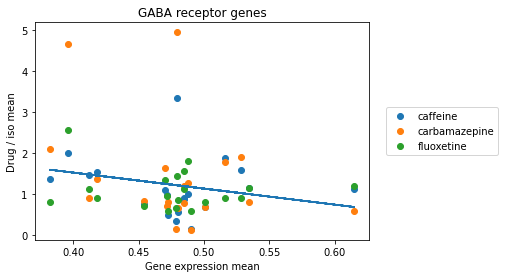

0.0 % of re-occurring highly-correlated genes (found via rabies vs gene exp) are ALSO in GABA receptor genes
0.42 % of genes in ISH data found in GABA receptor genes
  
r_val: -0.22584761162486516
p_val: 0.08272251127955434


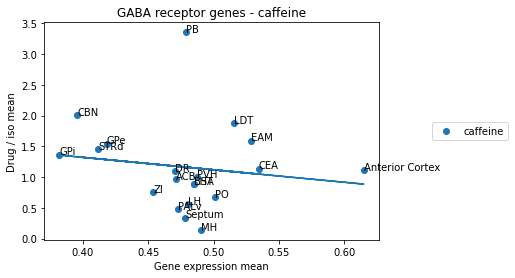

r_val: -0.14780892841178292
p_val: 0.5340142853940417


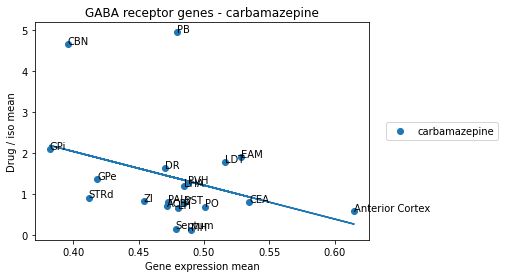

r_val: -0.3346428026313818
p_val: 0.14925332292639598


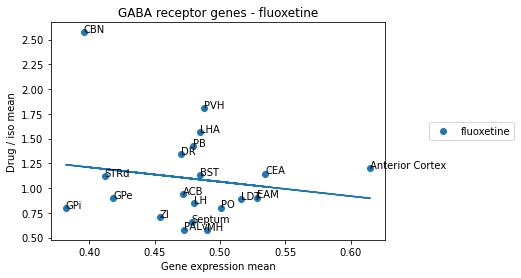

r_val: -0.15822025262848335
p_val: 0.5052589779315948


In [61]:
gabas=pd.read_csv('data/group-562.csv',skiprows=1)
gene_list=gabas['Approved symbol']
#from https://www.genenames.org/data/genegroup/#!/group/562
title_info='GABA receptor genes'
print_and_plot(gene_list,title_info)

# Random families of genes to compare - make sure they're not important

# Mitochondria

Number of genes: 54


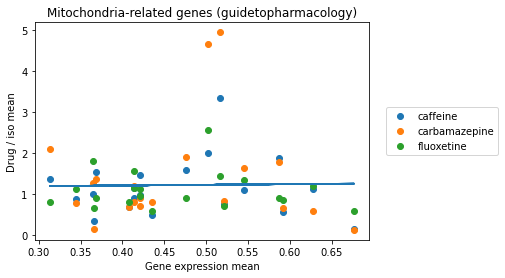

0.0 % of re-occurring highly-correlated genes (found via rabies vs gene exp) are ALSO in Mitochondria-related genes (guidetopharmacology)
0.28 % of genes in ISH data found in Mitochondria-related genes (guidetopharmacology)
  
r_val: 0.018448206424111595
p_val: 0.888735036844085


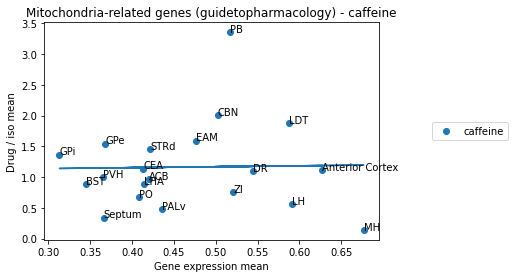

r_val: 0.021441797034494763
p_val: 0.9285048699837333


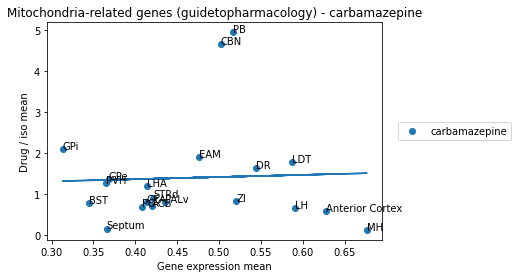

r_val: 0.0415603765918212
p_val: 0.8618886773043563


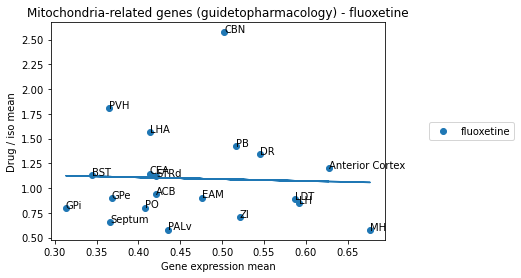

r_val: -0.03918112023270596
p_val: 0.8697287494109212


In [62]:
substring = "Mitochondria"
strings=list(gene_list2['Family name'])

channel = [string for string in strings if str(substring) in str(string)]
channels = gene_list2[gene_list2['Family name'].isin(channel)]  
gene_list=list(channels['MGI symbol']) 
print('Number of genes: '+str(len(gene_list)))
title_info='Mitochondria-related genes (guidetopharmacology)'
print_and_plot(gene_list,title_info)

# Random families of genes to compare - make sure they're not important

# Tumour-associated

Number of genes: 35


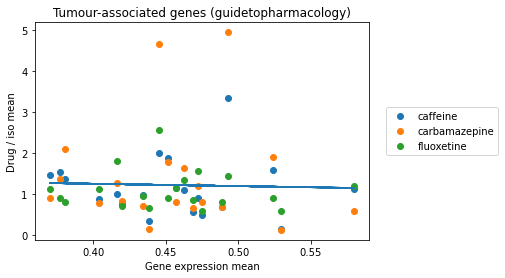

0.0 % of re-occurring highly-correlated genes (found via rabies vs gene exp) are ALSO in Tumour-associated genes (guidetopharmacology)
0.233 % of genes in ISH data found in Tumour-associated genes (guidetopharmacology)
  
r_val: -0.033858091669108956
p_val: 0.7973175150389227


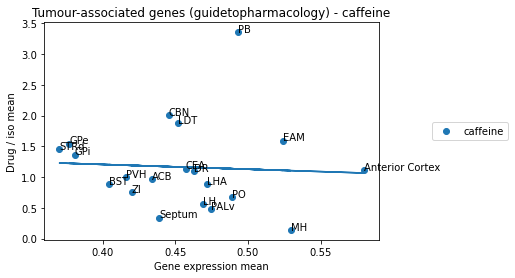

r_val: -0.05792905589579505
p_val: 0.8083240559953178


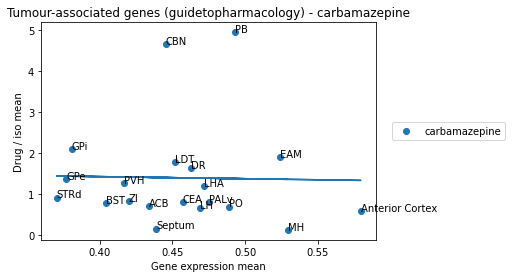

r_val: -0.021339344008544522
p_val: 0.9288456563772762


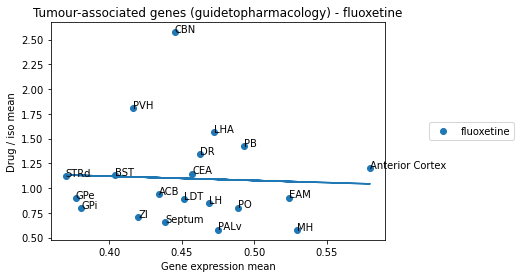

r_val: -0.04785699629268089
p_val: 0.841201935312381


In [63]:
substring = "Tumour"
strings=list(gene_list2['Family name'])

channel = [string for string in strings if str(substring) in str(string)]
channels = gene_list2[gene_list2['Family name'].isin(channel)]  
gene_list=list(channels['MGI symbol']) 
print('Number of genes: '+str(len(gene_list)))
title_info='Tumour-associated genes (guidetopharmacology)'
print_and_plot(gene_list,title_info)

# Random families of genes to compare - make sure they're not important

# Sugar transporters

Number of genes: 36


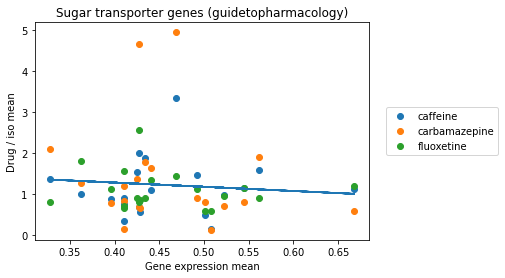

0.0 % of re-occurring highly-correlated genes (found via rabies vs gene exp) are ALSO in Sugar transporter genes (guidetopharmacology)
0.327 % of genes in ISH data found in Sugar transporter genes (guidetopharmacology)
  
r_val: -0.08798687043421634
p_val: 0.5038114569896481


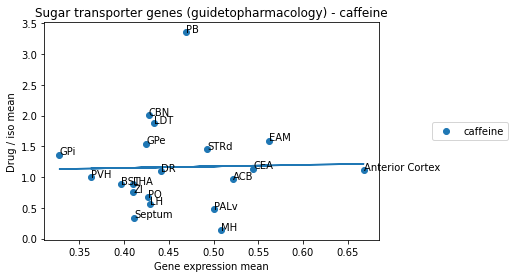

r_val: 0.026995176318427346
p_val: 0.9100522693225159


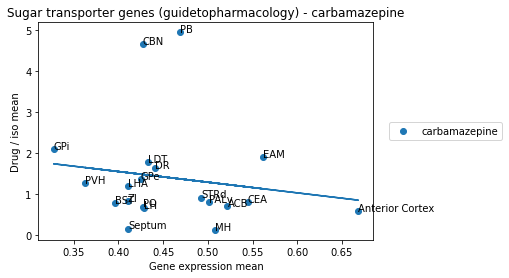

r_val: -0.15686618100871524
p_val: 0.5089561323436386


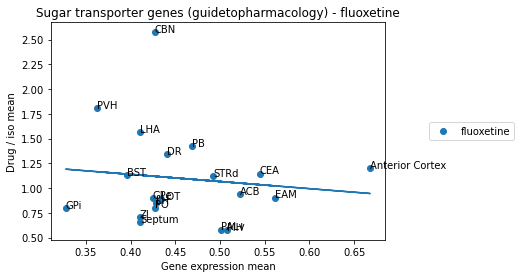

r_val: -0.11637909331178904
p_val: 0.625113028334786


In [64]:
substring = "sugar transporter"
strings=list(gene_list2['Family name'])

channel = [string for string in strings if str(substring) in str(string)]
channels = gene_list2[gene_list2['Family name'].isin(channel)]  
gene_list=list(channels['MGI symbol']) 
print('Number of genes: '+str(len(gene_list)))
title_info='Sugar transporter genes (guidetopharmacology)'
print_and_plot(gene_list,title_info)

# Back to possibly relevant genes -

# exo/endocytosis

still looking for more complete set of genes!!! this is so few

synaptojanin, intersectin, nervous wreck, and endophilin ... from doi: 10.1101/cshperspect.a005645

r_val: -0.11669849621826736
p_val: 0.37455872821786773


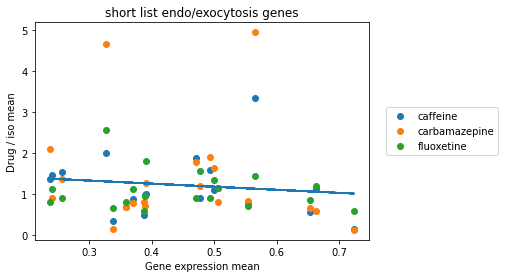

In [65]:
gene_list=['SYNJ1','ITSN1','Nwk','SH3GL2','SH3GL1']
lst2=np.unique(gene_list)
for i,val in enumerate(lst2):
    lst2[i] =val.lower()
lst1=list(gene_exp.columns) #want return values of list 1 that are in list 2
for i,val in enumerate(lst1):
    lst1[i] =val.lower()
lst3=list(set(lst1).intersection(lst2)) 
temp3=[]
temp4=[]
for drug in druglist:
    temp=note8[note8['drug']==drug]
    selectedgenes= gene_exp_lowercase[lst3]
    temp=notedatas8[notedatas8['drug']==drug]['ratio_drugviso']
    temp1=list(selectedgenes.mean(axis=1))
    temp3=temp3+list(temp)
    temp4=temp4+list(temp1)
    plt.scatter(temp1,temp,label=drug)
#obtain m (slope) and b(intercept) of linear regression line
m, b, r_value, p_value, std_err = sp.stats.linregress(temp4, temp3)
#m, b = np.polyfit(temp1, temp, 1)
temp3 = [m*i+b  for i in list(temp4)]
#add linear regression line to scatterplot 
plt.plot(temp4, temp3)

plt.xlabel('Gene expression mean')
plt.ylabel('Drug / iso mean')
plt.title('short list endo/exocytosis genes')
plt.legend(loc="right",bbox_to_anchor=(1.4, 0.5)) 
print('r_val: '+str(r_value))
print('p_val: '+str(p_value))
plt.savefig("figures/notebook_11/controls-in65.svg")

# KEGG Pathway – Endocytosis

https://dna.brc.riken.jp/en/gsb0000en/gsb0028en

r_val: -0.03808353716400778
p_val: 0.772663166915182


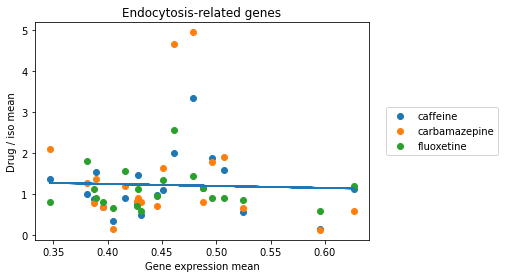

In [66]:
gene_list2 =pd.read_csv("data/kegg_endocytosis.csv")
gene_list=gene_list2['symbol']
lst2=np.unique(gene_list)
for i,val in enumerate(lst2):
    lst2[i] =val.lower()
lst1=list(gene_exp.columns) #want return values of list 1 that are in list 2
for i,val in enumerate(lst1):
    lst1[i] =val.lower()
lst3=list(set(lst1).intersection(lst2)) 
temp3=[]
temp4=[]
for drug in druglist:
    temp=note8[note8['drug']==drug]
    selectedgenes= gene_exp_lowercase[lst3]
    temp=notedatas8[notedatas8['drug']==drug]['ratio_drugviso']
    temp1=list(selectedgenes.mean(axis=1))
    temp3=temp3+list(temp)
    temp4=temp4+list(temp1)
    plt.scatter(temp1,temp,label=drug)
#obtain m (slope) and b(intercept) of linear regression line
m, b, r_value, p_value, std_err = sp.stats.linregress(temp4, temp3)
#m, b = np.polyfit(temp1, temp, 1)
temp3 = [m*i+b  for i in list(temp4)]
#add linear regression line to scatterplot 
plt.plot(temp4, temp3)

plt.xlabel('Gene expression mean')
plt.ylabel('Drug / iso mean')
plt.title('Endocytosis-related genes')
plt.legend(loc="right",bbox_to_anchor=(1.4, 0.5)) 
print('r_val: '+str(r_value))
print('p_val: '+str(p_value))

plt.savefig("figures/notebook_11/controls-in66.svg")

In [67]:
gene_list=lst2
all_genes=lst1#pop out my brain region column 
repets= repetneg+repetpos 
for i,val in enumerate(repets):
    repets[i] =val.lower()
count=0
for n in repets:
    if n in gene_list:
        count+=1
perc=100*count/len(repets)
statemt=str(round(perc,3))+' % of re-occurring highly-correlated genes (found via rabies vs gene exp) are ALSO in the list of Endocytosis-related genes'
print(statemt)
count=0
for n in all_genes:
    if n in gene_list:
        count+=1
perc=100*count/len(all_genes)
statemt2=str(round(perc,3))+' % of genes in ISH data found in Endocytosis-related genes'
print(statemt2) 

2.273 % of re-occurring highly-correlated genes (found via rabies vs gene exp) are ALSO in the list of Endocytosis-related genes
1.261 % of genes in ISH data found in Endocytosis-related genes


# epigenetic regulation genes
sources or explanation of why these genes: https://docs.google.com/document/d/1dOpHl3rHjvojfLRWlXum4cPspVjAXc9ysRfuh7OneVQ/edit?usp=sharing

Number of genes: 5


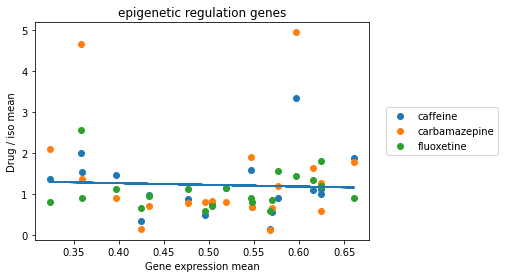

0.0 % of re-occurring highly-correlated genes (found via rabies vs gene exp) are ALSO in epigenetic regulation genes
0.117 % of genes in ISH data found in epigenetic regulation genes
  
r_val: -0.045251769302898245
p_val: 0.7313568847308205


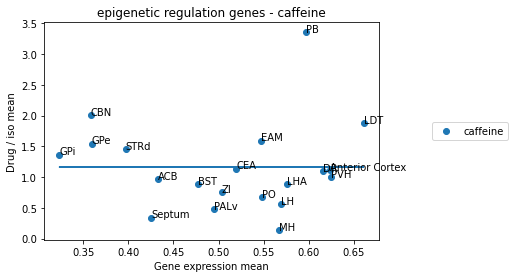

r_val: 0.0004770459939673588
p_val: 0.9984073970080519


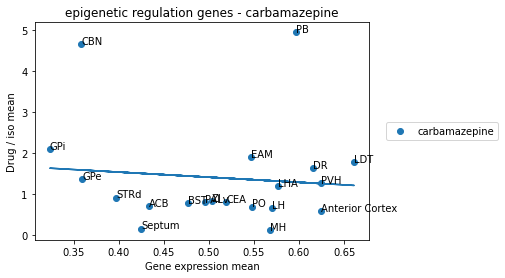

r_val: -0.09705835192731498
p_val: 0.6839545029557823


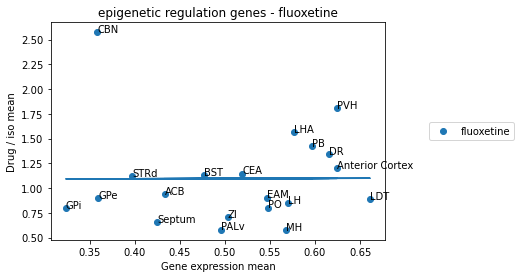

r_val: 0.004045582514739635
p_val: 0.986494531731849


In [68]:
gene_list=list(np.unique(['NSD1', 'EZH2', 'DNMT3A', 'CHD8', 'HIST1H1E','EED', 'DNMT1', 'DNMT3B', 'MBD1','MBD4', 'TET1', 'TET2', 'TET3'])) 
## ok literally none of those are in our gene list ^^
gene_list=['Hdac6','Hdac7','Prmt2','Kdm3b','Kdm4b']
print('Number of genes: '+str(len(gene_list)))
title_info='epigenetic regulation genes'
print_and_plot(gene_list,title_info)
 

# immediate early genes

sources or explanation of why these genes: https://docs.google.com/document/d/1dOpHl3rHjvojfLRWlXum4cPspVjAXc9ysRfuh7OneVQ/edit?usp=sharing

Number of genes: 11


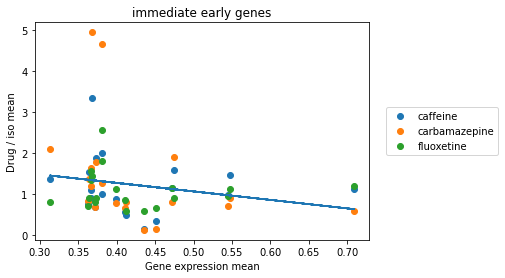

0.0 % of re-occurring highly-correlated genes (found via rabies vs gene exp) are ALSO in immediate early genes
0.257 % of genes in ISH data found in immediate early genes
  
r_val: -0.208681894576791
p_val: 0.10957389689166645


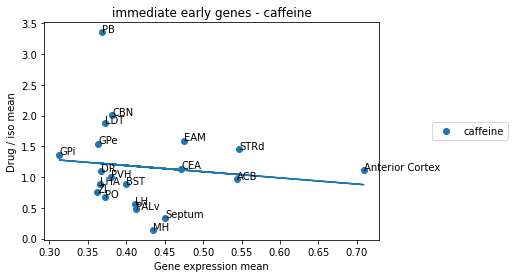

r_val: -0.12817902045181584
p_val: 0.5901947202465743


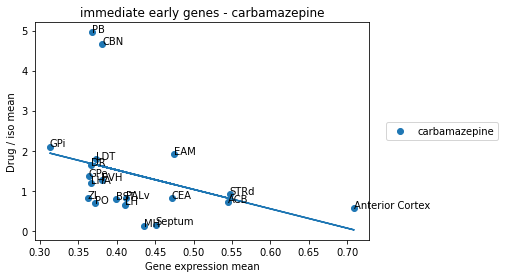

r_val: -0.34123937881268057
p_val: 0.14090601224063332


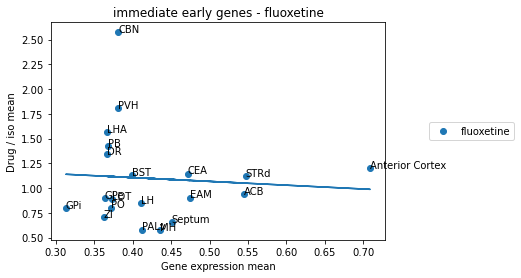

r_val: -0.07273995288291238
p_val: 0.7605484091933212


In [69]:
gene_list=list(np.unique(['Fos','Arc','Egr1','Egr2','Egr3','Egr4','Jun','Junb','Ier2','Ier3','Ier5'])) 
print('Number of genes: '+str(len(gene_list)))
title_info='immediate early genes'
print_and_plot(gene_list,title_info)

# I'm ignoring below for now 

In [70]:
# ignore everything below this cell

In [71]:
#  IGNORE

In [72]:
# Don't look at me

# Don't look at me

# Focused on above as I think it's more promising. Below are some of the same plots as plotted above but using difference rather than ratio to calculate correlation.

# Difference (drug - iso rabies)

In [73]:
# for drug in druglist:
#     temp=notedatas10[notedatas10['drug']==drug]['diff_drugviso']
#     temp1=list(gene_exp.mean(axis=1))
#     plt.scatter(temp1,temp,label=drug)
# plt.xlabel('Gene expression mean')
# plt.ylabel('Drug - iso mean')
# plt.title('ALL GENES')
# plt.legend(loc="right",bbox_to_anchor=(1.4, 0.5))

# ^^ again no clear correlation when using ALL genes. ^^ 

In [74]:
# temp3=[]
# temp4=[]
# for drug in druglist:
#     temp=note10[note10['drug']==drug]
#     selectedgenes= gene_exp_lowercase[lst3]
#     temp=notedatas10[notedatas10['drug']==drug]['diff_drugviso']
#     temp1=list(selectedgenes.mean(axis=1))
#     temp3=temp3+list(temp)
#     temp4=temp4+list(temp1)
#     plt.scatter(temp1,temp,label=drug)
# #obtain m (slope) and b(intercept) of linear regression line
# m, b, r_value, p_value, std_err = sp.stats.linregress(temp4, temp3)
# #m, b = np.polyfit(temp1, temp, 1)
# temp3 = [m*i+b  for i in list(temp4)]
# #add linear regression line to scatterplot 
# plt.plot(temp4, temp3)

# plt.xlabel('Gene expression mean')
# plt.ylabel('Drug / iso mean')
# plt.title('Synapse-Related genes')
# plt.legend(loc="right",bbox_to_anchor=(1.4, 0.5)) 
# print('r_val: '+str(r_value))
# print('p_val: '+str(p_value))

In [75]:
# for drug in druglist:
#     temp=notedatas10[notedatas10['drug']==drug]['diff_drugviso']
#     temp1=list(gene_exp.mean(axis=1))
#     plt.scatter(temp1,temp,label=drug)
#     plt.xlabel('Gene expression mean')
#     plt.ylabel('Drug - iso mean')
#     plt.title('ALL GENES')
#     plt.legend(loc="right",bbox_to_anchor=(1.4, 0.5))
#     for i, txt in enumerate(regions):
#         plt.annotate(txt, (temp1[i], temp[i]))
#     plt.show()

In [76]:

# for drug in druglist:
#     temp=note10[note10['drug']==drug]
#     temp1=temp[temp['spearman_correlation']>thresh]
#     genelist1=list(temp1['gene'])
#     genelist=genelist1
#     selectedgenes= gene_exp[genelist]
#     temp=notedatas10[notedatas10['drug']==drug]['diff_drugviso']
#     temp1=list(selectedgenes.mean(axis=1))
#     plt.scatter(temp1,temp,label=drug)
# plt.xlabel('Gene expression mean')
# plt.ylabel('Drug - iso mean')
# plt.title('Positively correlated genes')
# plt.legend(loc="right",bbox_to_anchor=(1.4, 0.5)) 